# 1. Importing libraries & Data

In [1]:
# general imports that we will need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set()

# data partition
from sklearn.model_selection import train_test_split

# filter methods
# - spearman 
# - chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import PredefinedSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error, root_mean_squared_error, mean_absolute_percentage_error
# embedded methods
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
# Scaler
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    RobustScaler
)

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Custom functions and variables
from functions import histogram_boxplot, labeled_barplot, stacked_barplot, distribution_plot_wrt_target, comparative_boxplot, comparative_barplot, detect_outliers_iqr
from vocab_prep import BRAND_MODEL_VOCAB

#set random seed for reproducibility
RSEED = 42
np.random.seed(RSEED)
pd.set_option('display.max_rows', 500)


#### Data Loading

In [2]:
# this loads the train data 
train_raw = pd.read_csv('project_data/train.csv')

# this loads the test data
test_raw = pd.read_csv('project_data/test.csv')

#print first five rows of the training data
train_raw.head()

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
1,53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
2,6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
3,29021,Ford,FIESTA,2018.0,12500,anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
4,10062,BMW,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0


#### Verify that carID can be used as index

In [3]:
train_raw['carID'].is_unique

True

In [4]:
train_raw['carID'].isna().any()

False

#### Set carID as index

In [5]:
# setting carID as index
train_raw.set_index('carID', inplace = True)

# sorting by index
train_raw.sort_index(inplace =True)

# displaying the first three rows
train_raw.head(3)

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
0,Aud,A3,2016.0,10990,Manual,57097.0,Diesel,0.0,83.1,1.6,75.0,4.0,0.0
1,Audi,A7,2017.0,22999,Semi-Auto,24337.0,diesel,150.0,55.4,3.0,31.0,0.0,0.0
2,Audi,A4,2016.0,14242,Manual,14900.0,Petrol,125.0,53.3,1.4,65.0,4.0,0.0


# 2. Exploratory Data Analysis

In [6]:
train = train_raw.copy()

test = test_raw.copy()

In [7]:
test

,carID,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,89856,Hyundai,I30,2022.878006,Automatic,30700.000000,petrol,205.0,41.5,1.6,61.0,3.0,0.0
1,106581,VW,Tiguan,2017.000000,Semi-Auto,-48190.655673,Petrol,150.0,38.2,2.0,60.0,2.0,0.0
2,80886,BMW,2 Series,2016.000000,Automatic,36792.000000,Petrol,125.0,51.4,1.5,94.0,2.0,0.0
3,100174,Opel,Grandland X,2019.000000,Manual,5533.000000,Petrol,145.0,44.1,1.2,77.0,1.0,0.0
4,81376,BMW,1 Series,2019.000000,Semi-Auto,9058.000000,Diesel,150.0,51.4,2.0,45.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32562,105775,VW,Tiguan,2017.000000,Manual,27575.000000,Petrol,145.0,46.3,1.4,94.0,1.0,0.0
32563,81363,BMW,X2,2020.000000,Automatic,1980.000000,Petrol,145.0,34.0,2.0,39.0,3.0,0.0
32564,76833,Audi,Q5,2019.000000,Semi-Auto,8297.000000,Diesel,145.0,38.2,2.0,88.0,4.0,0.0
32565,91768,Mercedes,A Class,2019.000000,Manual,-50755.210230,Petrol,145.0,28.5,1.3,81.0,1.0,0.0


In [8]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Brand,74452,72,Ford,14808,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,74456,735,Focus,6353,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,74482.0,NaN,NaN,NaN,2017.096611,2.208704,1970.0,2016.0,2017.0,2019.0,2024.121759
price,75973.0,NaN,NaN,NaN,16881.889553,9736.926322,450.0,10200.0,14699.0,20950.0,159999.0
transmission,74451,40,Manual,38050,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mileage,74510.0,NaN,NaN,NaN,23004.184088,22129.788366,-58540.574478,7423.25,17300.0,32427.5,323000.0
fuelType,74462,34,Petrol,37995,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tax,68069.0,NaN,NaN,NaN,120.329078,65.521176,-91.12163,125.0,145.0,145.0,580.0
mpg,68047.0,NaN,NaN,NaN,55.152666,16.497837,-43.421768,46.3,54.3,62.8,470.8
engineSize,74457.0,NaN,NaN,NaN,1.660136,0.573462,-0.103493,1.2,1.6,2.0,6.6


In [9]:
# let's check the data types
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75973 entries, 0 to 75972
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           74452 non-null  object 
 1   model           74456 non-null  object 
 2   year            74482 non-null  float64
 3   price           75973 non-null  int64  
 4   transmission    74451 non-null  object 
 5   mileage         74510 non-null  float64
 6   fuelType        74462 non-null  object 
 7   tax             68069 non-null  float64
 8   mpg             68047 non-null  float64
 9   engineSize      74457 non-null  float64
 10  paintQuality%   74449 non-null  float64
 11  previousOwners  74423 non-null  float64
 12  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 8.1+ MB


In [10]:
# let's check a sample of the data
train.sample(10)

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
69512,VW,Golf,2016.0,22290,Semi-Auto,28421.000000,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
53000,Toyota,Yaris,2019.0,13790,Manual,4589.000000,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.000000,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
29021,Ford,FIESTA,2018.0,12500,anual,9102.000000,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
10062,BMW,2 Series,2019.0,22995,Manual,1000.000000,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0
14704,BMW,3 Series,2014.0,8199,anual,101153.348285,Diesel,30.0,65.700000,2.0,74.0,0.000000,0.0
6924,Audi,A3,2017.0,16089,Manual,21396.000000,Petrol,20.0,60.100000,1.4,75.0,4.000000,0.0
50783,Skoda,Octavia,2017.0,7500,Manual,116750.000000,Diesel,145.0,68.900000,1.6,59.0,4.000000,0.0
67071,VW,Passat,2017.0,15999,Semi-Auto,30339.000000,Diesel,150.0,62.800000,2.0,85.0,4.000000,0.0


## 2.1 Inconsistencies

**Brand**

Typing errors

In [11]:
# display all unique values 
train['Brand'].unique()

array(['Aud', 'Audi', nan, 'audi', 'udi', 'AUDI', 'UDI', 'ud', 'aud',
       'AUD', 'BMW', 'MW', 'bmw', 'BM', 'mw', 'Ford', 'ford', 'for',
       'FORD', 'For', 'ord', 'ORD', 'FOR', 'or', 'Hyundai', 'Hyunda',
       'yundai', 'hyundai', 'HYUNDAI', 'hyunda', 'HYUNDA', 'yunda',
       'Mercedes', 'mercedes', 'MERCEDES', 'ercedes', 'Mercede', 'ercede',
       'ERCEDES', 'MERCEDE', 'mercede', 'Skoda', 'koda', 'SKODA', 'Skod',
       'SKOD', 'skoda', 'kod', 'skod', 'KODA', 'Toyota', 'toyota',
       'TOYOTA', 'Toyot', 'oyota', 'TOYOT', 'OYOTA', 'toyot', 'Opel',
       'pel', 'opel', 'Ope', 'OPEL', 'OPE', 'PEL', 'ope', 'pe', 'VW', 'W',
       'v', 'V', 'vw', 'w'], dtype=object)

In [12]:
# change all values to lower case and strip starting and ending spaces
train['Brand'] = train['Brand'].str.lower().str.strip()

np.array(sorted(train['Brand'].dropna().unique()))

array(['aud', 'audi', 'bm', 'bmw', 'ercede', 'ercedes', 'for', 'ford',
       'hyunda', 'hyundai', 'kod', 'koda', 'mercede', 'mercedes', 'mw',
       'ope', 'opel', 'or', 'ord', 'oyota', 'pe', 'pel', 'skod', 'skoda',
       'toyot', 'toyota', 'ud', 'udi', 'v', 'vw', 'w', 'yunda', 'yundai'],
      dtype='<U8')

In [13]:
train['Brand'].isna().sum()

1521

**model**

Typing errors

In [14]:
print(f'The number of unique model values is {train['model'].unique().size}')

The number of unique model values is 736


In [15]:
# change all values to lower case and strip starting and ending spaces
train['model'] = train['model'].str.lower().str.strip()

print(f'After lowercase and strip the number of unique values is {train['model'].unique().size}')

After lowercase and strip the number of unique values is 297


In [16]:
train['model'].unique()

array(['a3', 'a7', 'a4', 'q3', 'a6', 'a5', 'tt', 'q7', 'a1', 'q2', 'rs5',
       'a8', 'q5', 'a', 's4', nan, 'q', 'q8', 'rs3', 'rs6', 'rs4', 'rs',
       's3', 'r8', 's8', 'sq5', 'a2', 'sq7', 's5', 't', '1 series',
       '3 series', '2 series', 'x1', 'x3', 'x5', '5 series', 'z4',
       '4 series', 'x6', 'x2', '2 serie', '5 serie', '6 series', 'x4',
       '7 series', '3 serie', 'm3', 'm4', 'i8', 'x', 'x7', 'm2', 'm',
       'm5', '4 serie', '1 serie', 'z3', 'i3', 'z', '8 series', 'm6',
       '7 serie', '8 serie', 'i', '6 serie', 'focus', 'focu', 'fiesta',
       'kuga', 'puma', 'ecosport', 'ka+', 'edge', 's-max', 'fusion',
       'fiest', 'c-max', 'ka', 'grand c-max', 'mondeo', 's-ma', 'monde',
       'tourneo connect', 'b-max', 'galaxy', 'mustang',
       'grand tourneo connect', 'tourneo custom', 'c-ma', 'kug', 'b-ma',
       'ecospor', 'grand c-ma', 'streetka', 'k', 'ranger', 'escort',
       'galax', 'edg', 'grand tourneo connec', 'tourneo custo', 'i30',
       'ix20', 'i10', 'i

In [17]:
train['model'].isna().sum()

1517

**transmission**

Typing errors

In [18]:
train['transmission'].unique()

array(['Manual', 'Semi-Auto', 'Automatic', 'anual', 'manual', 'AUTOMATIC',
       'Manua', 'emi-Auto', nan, 'unknown', 'SEMI-AUTO', 'Semi-Aut',
       'nknown', 'Manual ', 'MANUAL', 'automatic', ' Manual ',
       'semi-auto', 'emi-auto', 'Automati', 'utomatic', 'anua', 'ANUAL',
       'unknow', 'SEMI-AUT', 'UTOMATIC', 'emi-Aut', 'MANUA', 'semi-aut',
       'EMI-AUTO', 'utomati', 'UNKNOWN', ' Manual', ' MANUAL ', 'manua',
       'AUTOMATI', ' manual ', 'manual ', 'Other', 'automati', 'nknow'],
      dtype=object)

In [19]:
# change all values to lower case and strip starting and ending spaces
train['transmission'] = train['transmission'].str.lower().str.strip()

np.array(sorted(train['transmission'].dropna().unique()))

array(['anua', 'anual', 'automati', 'automatic', 'emi-aut', 'emi-auto',
       'manua', 'manual', 'nknow', 'nknown', 'other', 'semi-aut',
       'semi-auto', 'unknow', 'unknown', 'utomati', 'utomatic'],
      dtype='<U9')

In [ ]:
train['transmission'].isna().sum()

In [ ]:
len(train.loc[train['transmission'] == 'unknown'])

741

In [ ]:
train['transmission'].isna().sum()

np.int64(1522)

**fuelType**

Typing errors

In [20]:
train['fuelType'].unique()

array(['Diesel', 'diesel', 'Petrol', 'Petro', 'etrol', 'petrol', 'iesel',
       'PETROL', nan, 'DIESEL', 'Diese', 'Hybrid', 'etro', 'ETROL',
       'iese', 'PETRO', 'petro', 'ybrid', 'diese', 'IESEL', 'Other',
       'HYBRID', 'hybrid', 'Hybri', 'DIESE', 'Othe', 'Electric', 'ETRO',
       'IESE', 'ybri', 'YBRID', 'OTHER', 'ther', 'HYBRI', 'other'],
      dtype=object)

In [21]:
# change all values to lower case and strip starting and ending spaces
train['fuelType'] = train['fuelType'].str.lower().str.strip()

np.array(sorted(train['fuelType'].dropna().unique()))

array(['diese', 'diesel', 'electric', 'etro', 'etrol', 'hybri', 'hybrid',
       'iese', 'iesel', 'othe', 'other', 'petro', 'petrol', 'ther',
       'ybri', 'ybrid'], dtype='<U8')

In [ ]:
len(train.loc[train['fuelType'] == 'other'])

167

In [ ]:
train['fuelType'].isna().sum()

np.int64(1511)

**year**

Non int values

In [22]:
print(train['year'].unique())
print("")
print(f'The number of rows with non-integer year values are: {train.loc[(train['year'] != round(train['year'])) & (train['year'].notna()), ['year']].size}')

[2016.         2017.         2019.         2015.         2020.
 2018.         2014.         2013.         2011.         2012.
 2023.60527574 2008.         2005.                   nan 2010.37154646
 2002.         2007.         2006.         2010.         2004.
 2003.         2009.         1998.         2024.12175905 2009.81675711
 2001.         1997.         1999.         2023.1169636  2010.67696784
 2000.         1996.         2022.87800554 2011.11118842 2023.97731126
 2011.21085349 1970.         2022.69668507 2012.69574039 2023.36707842
 2010.26863473 2010.56500919 2023.26798867 2023.38982198 2010.7464032 ]

The number of rows with non-integer year values are: 723


In [23]:
# lets see the rows where year is not integer and not nan
train[(train['year'] != round(train['year'])) & (train['year'].notna())].sample(5)

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
34011,hyundai,tucson,2011.111188,13750,manual,22445.0,iesel,30.0,61.7,1.7,75.0,4.0,0.0
30502,ford,kuga,2010.676968,19500,manual,24509.0,diesel,150.0,54.3,2.0,55.0,2.0,0.0
10511,bmw,5 series,2009.816757,11450,manual,60529.0,diesel,30.0,65.7,2.0,81.0,3.0,0.0
40542,mercedes,c class,2011.210853,26550,automatic,4001.0,diesel,NaN,NaN,2.0,61.0,2.0,0.0
54299,toyota,hilux,2023.367078,24995,automatic,NaN,diese,260.0,36.2,2.4,88.0,0.0,0.0


**mileage**

Negative values

In [24]:
print(f'The number of rows with negative mileage values is: {train.loc[train['mileage'] < (0), ['mileage']].size}')

The number of rows with negative mileage values is: 369


In [25]:
# lets see the rows where mileage is negative
train.loc[train['mileage'] < 0].sample(5)

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
25987,ford,focus,2017.0,17500,manual,-42650.453719,petrol,145.0,41.50000,2.0,57.0,1.0,0.0
39727,mercedes,c class,2017.0,16911,semi-auto,-50755.210230,diesel,150.0,65.70000,1.6,94.0,2.0,0.0
32108,hyundai,tucson,2016.0,12990,manual,-36635.042697,diesel,30.0,61.70000,1.7,61.0,4.0,0.0
24959,ford,fiesta,2019.0,14100,manual,-42650.453719,petrol,145.0,27.70949,1.0,95.0,3.0,0.0
46275,mercedes,c class,2019.0,25080,semi-auto,-50755.210230,petrol,145.0,42.20000,1.5,32.0,1.0,0.0


**tax**

Negative values

In [26]:
print(train['tax'].unique())
print("")
print(f'The number of rows with negative tax values is: {train.loc[train['tax'] < (0), ['tax']].size}')

[  0.         150.         125.         145.                  nan
  30.          20.         235.         555.         200.
 -60.6840948  160.         205.         240.         260.
 265.         330.         327.91577835 300.         295.
 565.         325.         195.         135.         165.
 305.         535.         140.         570.         280.
 315.         540.         220.         580.         190.
 155.         230.         -43.24208237 316.48718937 270.
 120.         255.         250.         110.         185.
 245.         -45.78061049 299.47350391 290.         115.
 210.         294.84340933 -31.91494466 -56.19320154 326.02823317
 520.          10.         277.38425448 -18.33074314 -91.12163048
 316.29630636 290.48678508 -20.24107949 130.         -49.15354066
 303.14889146]

The number of rows with negative tax values is: 378


In [27]:
# lets see the rows where tax is negative
train.loc[train['tax'] < 0].sample(5)

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
27962,ford,ecosport,2017.0,9199,manual,29778.00000,etrol,-45.780610,52.3,1.0,41.0,0.0,0.0
31916,hyundai,tucson,2019.0,22500,manual,6155.00000,hybrid,-31.914945,51.4,1.6,63.0,3.0,0.0
4781,audi,q2,2017.0,21000,automatic,23000.00000,petrol,-60.684095,52.3,1.4,69.0,4.0,0.0
44395,mercedes,a class,2017.0,12900,automatic,-50755.21023,diesel,-56.193202,76.4,1.5,84.0,3.0,0.0
58917,opel,astra,2017.0,9260,manual,29663.00000,diesel,-20.241079,76.3,1.6,86.0,0.0,0.0


In [28]:
#lets see the rows where tax is not integer and not nan and greater than 0
train[(train['tax'] != round(train['tax'])) & (train['tax'].notna()) & (train['tax'] > 0)].sample(5)

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
70050,vw,polo,2018.0,11412,manual,9529.0,petrol,303.148891,60.1,1.0,46.0,2.0,0.0
13035,bmw,x1,2012.0,9500,automatic,53524.0,diesel,316.487189,52.3,2.0,46.0,4.0,0.0
57765,opel,corsa,2013.0,4750,manual,64546.0,petrol,290.486785,51.4,1.2,98.0,0.0,0.0
67186,NaN,golf,2018.0,15999,manual,9427.0,petrol,303.148891,47.9,1.5,65.0,4.0,0.0
34649,hyundai,i10,2020.0,13949,semi-auto,6000.0,petrol,294.843409,52.3,1.2,97.0,2.0,0.0


**mpg**

Negative values

In [29]:
print(train['mpg'].unique())
print("")
print(f'The number of rows with negative mpg values is: {train.loc[train['mpg'] < (0), ['mpg']].size}')

[ 83.1         55.4         53.3         51.4         47.9
  57.6         58.9         46.3         49.6         33.2
  40.9         32.1         31.4         47.1         54.3
  80.7         64.2         39.8         68.9         74.3
  44.1         38.7         38.2         67.3         44.8
  26.4         39.2         42.8         42.2         48.7
  60.1         56.5         32.8         50.4         52.3
  41.5         43.5         32.5         61.4         40.4
  65.7                 nan  34.9         37.2         70.6
  45.6         35.8          9.82146197  34.          34.5
  22.4         76.3         62.8         33.6         30.7
  89.77369267  36.7         31.7         29.4         30.1
  36.2         37.7         29.7         29.1         72.4
  35.3        141.3        117.7         31.          34.4
  57.7        156.9         21.1         28.8        176.6
  42.1         33.3         20.3        188.3         76.4
  19.6         21.9         24.1         21.6         22

In [30]:
#lets see the rows where mpg is negative
train.loc[train['mpg'] < 0].sample(5)


,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
13698,bmw,3 series,2016.0,13750,manual,59222.0,diesel,125.0,-43.421768,2.0,74.0,1.0,0.0
13901,bmw,1 series,2019.0,22890,unknown,10927.0,petrol,150.0,-43.421768,1.5,78.0,4.0,0.0
13713,mw,3 series,2020.0,34900,automatic,100.0,diesel,145.0,-43.421768,2.0,49.0,4.0,0.0
13855,bmw,3 series,NaN,20000,automatic,27725.0,diesel,145.0,-43.421768,2.0,96.0,1.0,0.0
14842,bmw,x1,2016.0,17225,manual,17531.0,diesel,125.0,-43.421768,2.0,60.0,2.0,0.0


**engineSize**	

Negative values

In [31]:
print(train['engineSize'].unique())
print("")
print(f'The number of rows with negative engineSize values is: {train.loc[train['engineSize'] < (0), ['engineSize']].size}')
print(f'The number of rows with zero engineSize values is: {train.loc[train['engineSize'] == 0, ['engineSize']].size}')

[ 1.6         3.          1.4         2.          1.8         1.
  1.5                nan  4.2         1.2         0.15452932  0.
  2.5         4.          3.73923548  2.9         2.7         5.2
  1.9         4.1         3.2         0.31340658  3.82275785  2.2
  4.4         6.6         0.6         3.5         5.          1.1
 -0.1034928   2.3         2.63120047  1.3         1.7         2.6631132
  0.37112737  2.4         2.1         3.72371217  0.30707394  5.5
  5.4         6.2         3.6         4.7         2.6         6.
  4.3         0.19146242  2.61964142  0.16286595  2.8         2.78177621
  4.5         0.7395339   2.06411863  0.18642488  2.98579344]

The number of rows with negative engineSize values is: 84
The number of rows with zero engineSize values is: 180


In [32]:
#lets see the rows where engineSize is negative
train.loc[train['engineSize'] < 0].sample(5)

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
17489,ford,ecosport,2015.0,9000,automatic,33161.0,petrol,160.0,44.8,-0.103493,90.0,4.0,0.0
23710,ford,fiesta,2015.0,8798,semi-auto,NaN,petrol,145.0,47.9,-0.103493,85.0,3.0,0.0
25786,ford,focus,2019.0,22495,automatic,4294.0,diesel,145.0,64.2,-0.103493,64.0,0.0,0.0
24009,ford,kuga,2017.0,17474,manual,NaN,diesel,145.0,54.3,-0.103493,33.0,1.0,0.0
23079,for,focus,NaN,20000,manual,6156.0,diesel,145.0,57.7,-0.103493,45.0,1.0,0.0


**paintQuality%**

% above 100 & non int values 

In [33]:
print(train['paintQuality%'].unique())
print("")
print(f'The number of rows with paintQuality% values above 100% is: {train.loc[train['paintQuality%'] > (100), ['paintQuality%']].size}')
print(f'The number of rows with non-integer paintQuality% values are: {train.loc[train['paintQuality%'] != round(train['paintQuality%']), ['paintQuality%']].size}')

[ 75.          31.          65.          55.          62.
  97.          77.          49.          79.          96.
  36.         125.30194543  80.          57.          83.
  47.          66.          30.          74.          85.
  99.          73.          67.          44.          45.
  56.          52.          81.           3.1152953   54.
          nan  78.          72.          82.          39.
  76.          34.          59.          48.          88.
  53.          41.          35.          94.          95.
  87.          70.          37.          51.          58.
  61.          86.          98.          60.          32.
  92.          84.          71.          91.          38.
  90.          50.          40.          33.          89.
  69.          42.          68.          43.          93.
  63.          46.          64.         125.5694986    3.14037046
   3.22574362 125.10995148   3.25476013 125.18872876 125.20203342
   3.20741784   2.72515272 125.4535988    1.63891309 125

In [34]:
#lets see the rows where paintQuality% is above 100% or non-integer and not nan
train.loc[(train['paintQuality%'] > 100) | (train['paintQuality%'] != round(train['paintQuality%'])) & (train['paintQuality%'].notna())].sample(5)

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
11096,bmw,2 series,2017.0,16498,semi-auto,27811.0,diesel,145.0,64.2,2.0,3.140370,3.0,0.0
38193,mercedes,glc class,2017.0,27950,automatic,22244.0,iesel,145.0,NaN,2.1,125.202033,3.0,0.0
34045,hyundai,santa fe,2020.0,35980,semi-auto,2196.0,diesel,145.0,39.2,2.2,3.254760,1.0,0.0
59911,opel,corsa,2014.0,4499,manual,46477.0,petrol,125.0,51.4,1.4,3.172683,1.0,0.0
7501,bmw,x2,2020.0,28993,semi-auto,101.0,diesel,145.0,61.4,2.0,125.569499,1.0,0.0


**previousOwners**	

Negative & non int values

In [35]:
print(train['previousOwners'].unique())
print("")
print(f'The number of rows with negative previousOwners values is: {train.loc[train['previousOwners'] < (0), ['previousOwners']].size}')
print(f'The number of rows with non-integer previousOwners values are: {train.loc[train['previousOwners'] != round(train['previousOwners']), ['previousOwners']].size}')

[ 4.          0.          1.          2.          3.                 nan
  6.2482512  -2.33512284 -2.31225953  6.23017958  6.25823052 -2.34030622
  6.22789796 -2.31733109  6.25837066 -2.33936045  6.24177863 -2.33744529
  6.21772443 -2.34010209 -2.29943868  6.23308217 -2.34565     6.24583495]

The number of rows with negative previousOwners values is: 371
The number of rows with non-integer previousOwners values are: 2284


In [36]:
#lets see the rows where previousOwners is negative or non-integer and not nan
train.loc[(train['previousOwners'] < 0) | (train['previousOwners'] != round(train['previousOwners'])) & (train['previousOwners'].notna())].sample(5)

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
55788,toyota,yaris,2013.0,5698,manual,57140.000000,petrol,125.0,51.4,1.3,85.0,-2.340102,0.0
37549,mercedes,c class,2017.0,20000,manual,28831.000000,diesel,145.0,65.7,2.1,80.0,-2.339360,0.0
57138,opel,corsa,2019.0,9800,manual,1835.000000,petrol,145.0,44.8,1.4,77.0,-2.299439,0.0
50665,skoda,octavia,2019.0,17795,manual,4442.000000,diesel,145.0,67.3,1.6,81.0,6.241779,0.0
67307,vw,arteon,2019.0,24990,semi-auto,-48190.655673,diesel,145.0,44.1,2.0,51.0,6.245835,0.0


**price**

In [37]:
train.loc[train['price'] != round(train['price']), 'price'].size

0

In [38]:
train.loc[train['price'] < 0, 'price'].size

0

**hasDamage**

Only zeros

In [39]:
print(train['hasDamage'].unique())

[ 0. nan]


## 2.1.1 Adress Inconsistencies

**Creation of metric and non-metric features**

In [40]:
metric_features = ['price','year', 'mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%', 'previousOwners']  
non_metric_features = ['Brand', 'model', 'transmission', 'fuelType','hasDamage']

**Vocabulary**

In [41]:
# Correct misspelled values in 'Brand' column
BRAND_CORRECTIONS = {
    'aud': 'audi',
    'udi': 'audi',
    'ud': 'audi',
    'mw': 'bmw',
    'bm': 'bmw',
    'for': 'ford',
    'ord': 'ford', 
    'or': 'ford',
    'hyunda': 'hyundai',
    'yundai': 'hyundai',
    'yunda': 'hyundai',
    'mercedes': 'mercedes-benz',
    'mercede': 'mercedes-benz',
    'ercedes': 'mercedes-benz',
    'ercede': 'mercedes-benz',
    'mercedes benz': 'mercedes-benz',
    'koda': 'skoda',
    'skod': 'skoda',
    'kod': 'skoda',
    'toyot': 'toyota',
    'oyota': 'toyota',
    'pel': 'opel',
    'pe': 'opel',
    'ope': 'opel',
    'vw': 'volkswagen',
    'v': 'volkswagen',
    'w': 'volkswagen'
}

Transmission_Corrections = {
    'anual': 'manual',
    'manua': 'manual',
    'anua': 'manual',
    'emi-auto': 'semi-auto',
    'semi-aut': 'semi-auto',
    'emi-aut': 'semi-auto',
    'automati': 'automatic',
    'utomatic': 'automatic',
    'utomati': 'automatic',
    'nknown': 'unknown',
    'unknow': 'unknown',
    'other': 'unknown',
    'nknow': 'unknown'
}

fuelType_Corrections = {
    'etro': 'petrol',
    'etrol': 'petrol',
    'petro': 'petrol',
    'hybri': 'hybrid',
    'ybri': 'hybrid',
    'ybrid': 'hybrid',
    'diese': 'diesel',
    'iese': 'diesel',
    'iesel': 'diesel',
    'othe': 'other',
    'ther': 'other'
}


**model vocabulary**

In [42]:
pure_brand_model_df = pd.DataFrame(BRAND_MODEL_VOCAB)
#pure_brand_model_df

In [43]:
# Explain why the count of unique models (both correct and typos) 
# differs between the 'vocabulary' (pure_brand_model_df) and the train dataset.
set1 = set(pure_brand_model_df['model_lower'].dropna().unique())
set2 = set(train['model'].dropna().unique())
print("len(set1)", len(set1))
print("len(set2)", len(set2))  
print("len(set2)-len(set1)", len(set2)-len(set1))
print("set(train['model']) - set(pure_brand_model_df['model_lower'])", set2 - set1)
print("set(pure_brand_model_df['model_lower']) - set(train['model'])", set1 - set2)

len(set1) 289
len(set2) 296
len(set2)-len(set1) 7
set(train['model']) - set(pure_brand_model_df['model_lower']) {'viv', 'z', 'rs', 'x', 't', 'a', 'i', 'q', 'm', 'kadjar'}
set(pure_brand_model_df['model_lower']) - set(train['model']) {'nan', 'veloster', 'suvra'}


In [44]:
# Fix model names only for rows with a known (non-NaN) Brand in the input DataFrame (train/val/test).
def model_fix_wo_nan(pure_brand_model_df, input_df):
    # (brand, model_lower) -> model_correct for rows that need correction
    fix_map = (pure_brand_model_df.query("correction == 1")
               .set_index(['brand','model_lower'])['model_correct'])
    
    # replace model only where a correction exists; otherwise keep original
    keys = list(zip(input_df['Brand'], input_df['model']))
    input_df['model'] = pd.Series(keys, index=input_df.index).map(fix_map).fillna(input_df['model'])
    return input_df['model']

In [45]:
deduped_model_df = pure_brand_model_df.copy()

In [46]:
# List all rows where the model name is "i3" across brands
# BMW "i3" is correct; Hyundai "i3" is a typo (should be "i30").
deduped_model_df[deduped_model_df['model_lower'].duplicated(keep=False)]

,brand,model_lower,model_correct,correction
41,bmw,i3,i3,0
99,hyundai,i3,i30,1


In [47]:
# Drop Hyundai i3 rows by index from a query
deduped_model_df = deduped_model_df.drop(deduped_model_df.query("brand == 'hyundai' and model_lower == 'i3'").index)
deduped_model_df[deduped_model_df['model_lower'].duplicated(keep=False)]

,brand,model_lower,model_correct,correction


In [48]:
# Fix model names only for rows with unknown (NaN) Brand in the input DataFrame (train/val/test).
def model_fix_with_nan(deduped_model_df, input_df):
    fix_map = deduped_model_df.loc[deduped_model_df['correction'] == 1].set_index('model_lower')['model_correct']
    
    mask = input_df['Brand'].isna()
    input_df.loc[mask, 'model'] = input_df.loc[mask, 'model'].map(fix_map).fillna(input_df.loc[mask, 'model'])
    return input_df['model']

In [49]:
# Fill missing Brand values
def brand_fix_with_nan(deduped_model_df, input_df):
    # Rows where Brand is NaN in input_df
    input_df.loc[input_df["Brand"].isna()][["Brand","model"]]
    
    # Map input_df['model'] to short_brand_model_df['model_lower']
    # to fill missing Brand values in input_df with the correct brand names from short_brand_model_df.
    input_df['Brand'] = input_df['Brand'].replace('', pd.NA)  # treat empty as missing
    input_df['Brand'] = input_df['Brand'].fillna(input_df['model'].map(deduped_model_df.set_index('model_lower')['brand']))
    return input_df['Brand']

**Fix Brand, model, transmission & fuelType**

In [50]:
def fix_brand_model_transmission_fuelType(input_df, pure_brand_model_df, deduped_model_df):
    
    input_df['Brand'] = input_df['Brand'].str.lower().str.strip()
    input_df['Brand'] = input_df['Brand'].replace(BRAND_CORRECTIONS)

    input_df['transmission'] = input_df['transmission'].str.lower().str.strip()
    input_df['transmission'] = input_df['transmission'].replace(Transmission_Corrections)

    input_df['fuelType'] = input_df['fuelType'].str.lower().str.strip()
    input_df['fuelType'] = input_df['fuelType'].replace(fuelType_Corrections)

    # change all values to lower case and strip starting and ending spaces
    input_df['model'] = input_df['model'].str.lower().str.strip()
    
    input_df['model'] = model_fix_wo_nan(pure_brand_model_df, input_df)
    input_df['model'] = model_fix_with_nan(deduped_model_df, input_df)
    input_df['Brand'] = brand_fix_with_nan(deduped_model_df, input_df)

    #

    input_df['Brand'] = (
        input_df['Brand'].astype('string').str.strip().replace('', pd.NA).fillna('unknown')
    )
    input_df['model'] = (
        input_df['model'].astype('string').str.strip().replace('', pd.NA).fillna('unknown')
    )
    return input_df   

In [51]:
#apply changes
train = fix_brand_model_transmission_fuelType(train, pure_brand_model_df, deduped_model_df)

test = fix_brand_model_transmission_fuelType(test, pure_brand_model_df, deduped_model_df)

**Fix Numerical features**

In [52]:
# need to inforce metric features to be indeed numeric
def enforce_metric_features(input_df, metric_features):
    for feature in metric_features:
        if feature != 'price':
            input_df[feature] = pd.to_numeric(input_df[feature], errors='coerce')
    return input_df

In [53]:
#All the changes in one function 
def fix_numerical_features(input_df):

    #round the non int year values
    input_df['year'] = input_df['year'].round()

    # set the negative tax values to NaN
    input_df.loc[input_df['tax'] < 0, 'tax'] = np.nan

    # sets the negative mileage values to NaN
    input_df.loc[input_df['mileage'] < 0, 'mileage'] = np.nan
        
    #sets the negative mpg values to NaN
    input_df.loc[input_df['mpg'] < 0, 'mpg'] = np.nan

    # sets the negative engineSize values to NaN
    input_df.loc[input_df['engineSize'] <= 0, 'engineSize'] = np.nan

    # sets the paintQuality% values above 100% & non int to NaN
    input_df.loc[(input_df['paintQuality%'] > 100) | (input_df['paintQuality%'] != round(input_df['paintQuality%'])), 'paintQuality%'] = np.nan

    #sets the negative previousOwners values & non int to NaN
    input_df.loc[(input_df['previousOwners'] < 0) | (input_df['previousOwners'] != round(input_df['previousOwners'])), 'previousOwners'] = np.nan
    
    return input_df

In [54]:
train = enforce_metric_features(train, metric_features)
train = fix_numerical_features(train)

test = enforce_metric_features(test, metric_features)
test = fix_numerical_features(test)

In [55]:
test

,carID,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,89856,hyundai,i30,2023.0,automatic,30700.0,petrol,205.0,41.5,1.6,61.0,3.0,0.0
1,106581,volkswagen,tiguan,2017.0,semi-auto,NaN,petrol,150.0,38.2,2.0,60.0,2.0,0.0
2,80886,bmw,2 series,2016.0,automatic,36792.0,petrol,125.0,51.4,1.5,94.0,2.0,0.0
3,100174,opel,grandland x,2019.0,manual,5533.0,petrol,145.0,44.1,1.2,77.0,1.0,0.0
4,81376,bmw,1 series,2019.0,semi-auto,9058.0,diesel,150.0,51.4,2.0,45.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32562,105775,volkswagen,tiguan,2017.0,manual,27575.0,petrol,145.0,46.3,1.4,94.0,1.0,0.0
32563,81363,bmw,x2,2020.0,automatic,1980.0,petrol,145.0,34.0,2.0,39.0,3.0,0.0
32564,76833,audi,q5,2019.0,semi-auto,8297.0,diesel,145.0,38.2,2.0,88.0,4.0,0.0
32565,91768,mercedes-benz,a class,2019.0,manual,NaN,petrol,145.0,28.5,1.3,81.0,1.0,0.0


In [56]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Brand,75973,10,ford,16384,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,75973,204,focus,6915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,74482.0,NaN,NaN,NaN,2017.096788,2.206001,1970.0,2016.0,2017.0,2019.0,2024.0
price,75973.0,NaN,NaN,NaN,16881.889553,9736.926322,450.0,10200.0,14699.0,20950.0,159999.0
transmission,74451,4,manual,41627,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mileage,74141.0,NaN,NaN,NaN,23352.797092,21620.630248,1.0,7556.0,17416.0,32510.0,323000.0
fuelType,74462,5,petrol,41181,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tax,67691.0,NaN,NaN,NaN,121.259276,64.493191,0.0,125.0,145.0,145.0,580.0
mpg,68011.0,NaN,NaN,NaN,55.204844,16.345534,1.1,46.3,54.3,62.8,470.8
engineSize,74193.0,NaN,NaN,NaN,1.666161,0.565495,0.154529,1.2,1.6,2.0,6.6


**Fix transmission**

In [ ]:
def transmission_unkown_nan_fix(input_df):
    
    # 1) Per-model most frequent transmission (exclude 'unknown' and NaN)
    valid_tx = train['transmission'].notna() & (train['transmission'] != 'unknown')
    tx_mode_by_model = (
        train.loc[valid_tx]
            .groupby('model')['transmission']
            .agg(lambda s: s.mode().iat[0] if not s.mode().empty else np.nan)
    )

    # 2) Replace 'unknown' OR NaN with the per-model mode
    tx_mask = input_df['transmission'].isna() | (input_df['transmission'] == 'unknown')
    input_df.loc[tx_mask, 'transmission'] = input_df.loc[tx_mask, 'model'].map(tx_mode_by_model)

    # 3) Global mode fallback (exclude 'unknown' and NaN)
    tx_global_mode = train.loc[valid_tx, 'transmission'].mode().iat[0]

    # 4) Any leftovers -> fill with global mode (covers unmapped models)
    input_df['transmission'] = (
        input_df['transmission']
            .fillna(tx_global_mode)               
            .replace('unknown', tx_global_mode)   )
    
    return input_df 

In [ ]:
train = transmission_unkown_nan_fix(train)

test = transmission_unkown_nan_fix(test)

In [ ]:
train['transmission'].unique()

array(['manual', 'semi-auto', 'automatic'], dtype=object)

**Fix fuelType**

In [ ]:
def fuelType_other_nan_fix(input_df):

    # 1) Get per-model most frequent fuel type (excluding 'other' and NaN)
    valid_ft = train['fuelType'].notna() & (train['fuelType'] != 'other')
    ft_mode_by_model = (
        train.loc[valid_ft]
             .groupby('model')['fuelType']
             .agg(lambda s: s.mode().iat[0] if not s.mode().empty else np.nan)
    )

    # 2) Replace 'other' or NaN with the per-model mode
    ft_mask = input_df['fuelType'].isna() | (input_df['fuelType'] == 'other')
    input_df.loc[ft_mask, 'fuelType'] = input_df.loc[ft_mask, 'model'].map(ft_mode_by_model)

    # 3) Global mode fallback (in case some models have no valid entries)
    ft_global_mode = train.loc[valid_ft, 'fuelType'].mode().iat[0]

    # 4) Fill remaining missing or 'other' with global mode
    input_df['fuelType'] = (
        input_df['fuelType']
        .fillna(ft_global_mode)
        .replace('other', ft_global_mode))
    
    return input_df

In [ ]:
train = fuelType_other_nan_fix(train)

test = fuelType_other_nan_fix(test)

In [ ]:
test['fuelType'].unique()

array(['petrol', 'diesel', 'hybrid', 'electric'], dtype=object)

## 2.2 Variable Exploration

### 2.2.1 Univariate Analysis

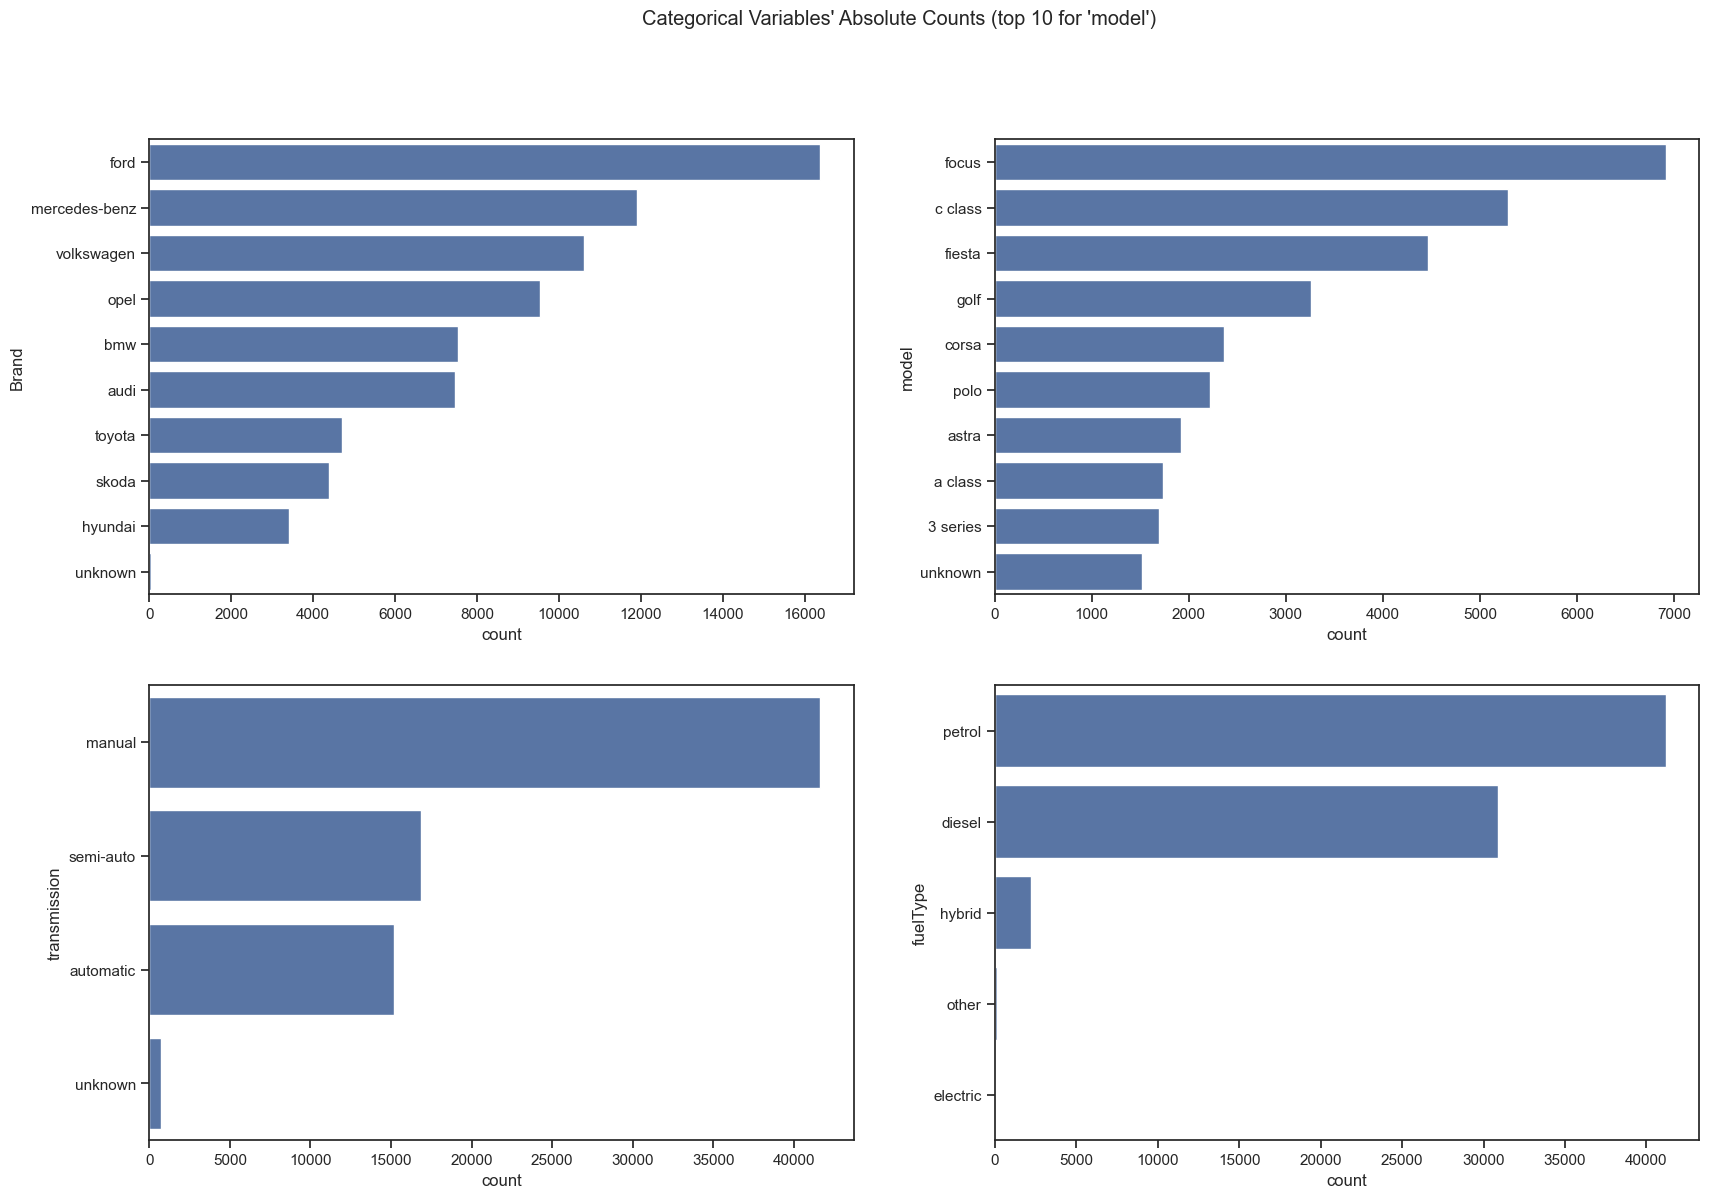

In [57]:
sns.set_style('ticks')

sp_rows = 2
sp_cols = 2

fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 13))

#only top 10 for model
for ax, feat in zip(axes.flatten(), non_metric_features):
    sns.countplot(y=feat, data=train, ax=ax, order=train[feat].value_counts().index[:10])

# Layout
# Add a centered title to the figure:
title = "Categorical Variables' Absolute Counts (top 10 for 'model')"

plt.suptitle(title)
plt.show()

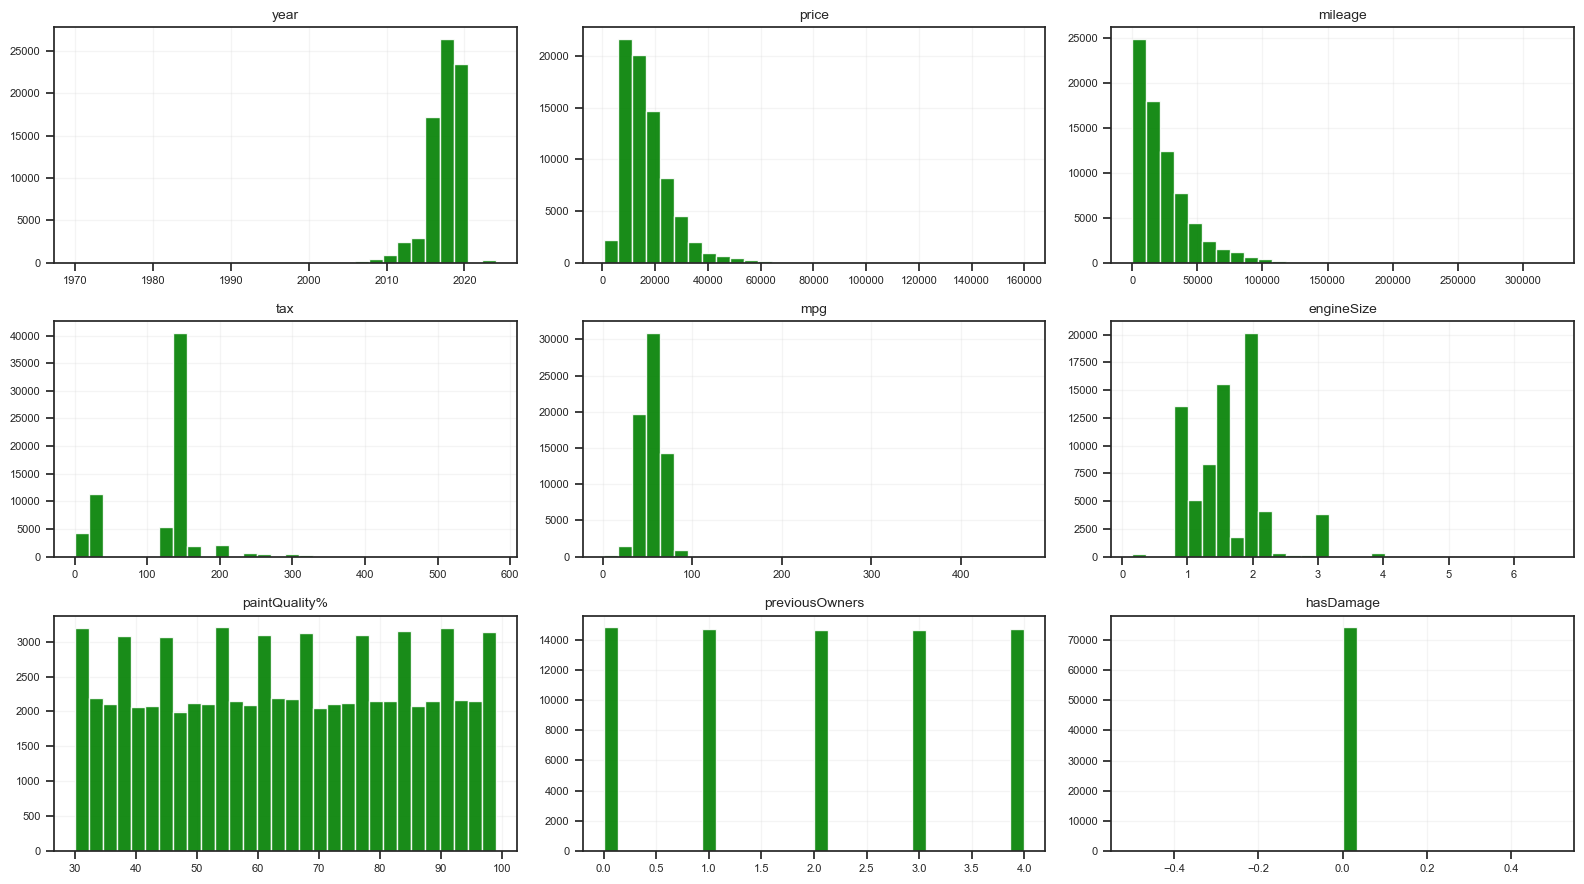

In [58]:
num = train.select_dtypes(include='number')
cols = num.columns.tolist()

n = len(cols)
ncols = 3
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(16, 3*nrows))
axes = axes.flatten() if n > 1 else [axes]

for ax, col in zip(axes, cols):
    ax.hist(num[col].dropna(), bins=30, color='green', edgecolor='white', alpha=0.9)
    ax.set_title(col, fontsize=10)
    ax.tick_params(labelsize=8)
    ax.grid(alpha=0.2)

for ax in axes[n:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

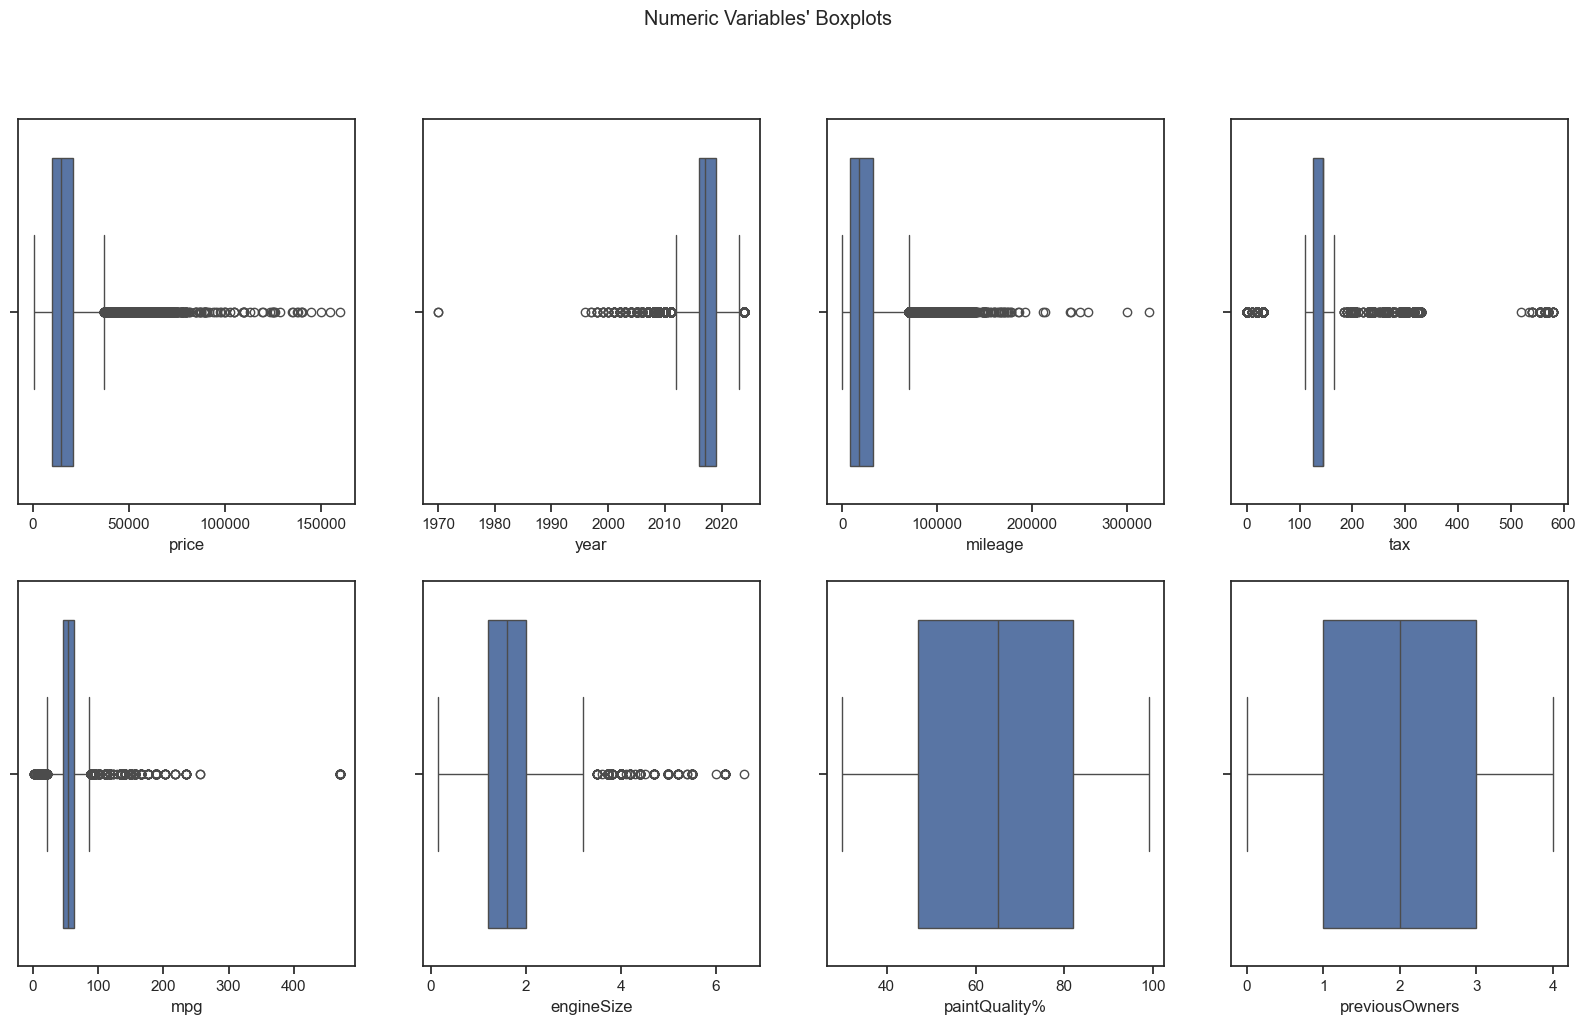

In [59]:
# Plot ALL Numeric Variables' Boxplots in one figure

sns.set_style('ticks')

sp_rows = 2
sp_cols = 4

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram
for ax, feat in zip(axes.flatten(), metric_features): 
    sns.boxplot(x=train[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Boxplots"

plt.suptitle(title)
plt.show()

In [60]:
# One outlier from 1970 - we dont have enough examples from old cars
train.loc[train['year'] < 1980]

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
35769,mercedes-benz,m class,1970.0,24999,automatic,14000.0,diesel,305.0,39.2,NaN,44.0,3.0,0.0
62732,opel,zafira,1970.0,10495,manual,37357.0,NaN,200.0,42.2,NaN,60.0,2.0,0.0


In [61]:
# Only bmw - i3 - Whole group of cars
train.loc[train['mpg'] > 400]

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
8497,bmw,i3,2017.0,21495,automatic,24041.0,hybrid,0.0,470.8,NaN,46.0,3.0,0.0
8993,bmw,i3,2016.0,18999,automatic,9990.0,NaN,0.0,470.8,NaN,44.0,0.0,0.0
9196,bmw,i3,2016.0,19850,automatic,19995.0,hybrid,0.0,470.8,NaN,79.0,3.0,0.0
9643,bmw,i3,2017.0,19948,automatic,20929.0,hybrid,135.0,470.8,NaN,71.0,2.0,0.0
9737,bmw,i3,2014.0,14495,automatic,34539.0,hybrid,0.0,470.8,NaN,42.0,0.0,0.0
9815,bmw,i3,2016.0,19875,automatic,20013.0,NaN,0.0,470.8,NaN,30.0,0.0,0.0
10133,bmw,i3,2017.0,19300,automatic,NaN,other,0.0,470.8,0.600000,95.0,4.0,0.0
10327,bmw,i3,2014.0,15450,automatic,42479.0,hybrid,0.0,470.8,NaN,79.0,2.0,0.0
10695,bmw,i3,2017.0,21494,automatic,NaN,hybrid,135.0,470.8,NaN,54.0,1.0,0.0


In [62]:
#not weird
train.loc[train['mileage'] > 200000]

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
4692,audi,a6,2008.0,2490,manual,323000.0,diesel,200.0,44.1,2.0,74.0,1.0,0.0
9978,bmw,x5,2012.0,7250,automatic,214000.0,diesel,300.0,37.7,3.0,68.0,1.0,0.0
39946,mercedes-benz,a class,2016.0,16249,NaN,240494.0,diesel,20.0,68.9,2.1,81.0,4.0,0.0
45370,mercedes-benz,v class,2010.0,6949,automatic,259000.0,diesel,540.0,30.7,3.0,54.0,1.0,0.0
48042,skoda,octavia,2010.0,1485,manual,250650.0,diesel,125.0,57.6,1.9,62.0,1.0,0.0
48382,skoda,octavia,2010.0,1190,manual,300000.0,diesel,125.0,57.6,1.9,79.0,2.0,0.0
48912,skoda,octavia,NaN,2750,automatic,241565.0,diesel,185.0,47.9,1.9,33.0,4.0,0.0
74387,volkswagen,caravelle,2012.0,11995,NaN,212000.0,diesel,325.0,34.4,2.0,42.0,2.0,0.0


In [63]:
# seems fine
train.loc[train['tax'] > 400].sample(9)

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
34571,hyundai,santa fe,2006.0,3490,manual,71000.0,petrol,555.0,28.8,2.4,31.0,2.0,0.0
5096,audi,q7,2012.0,17999,automatic,65675.0,diesel,555.0,28.5,4.1,96.0,3.0,0.0
42643,mercedes-benz,sl class,2015.0,47124,automatic,11000.0,petrol,555.0,28.5,5.5,76.0,NaN,0.0
45646,mercedes-benz,m class,2007.0,6750,automatic,67000.0,diesel,555.0,28.8,3.0,71.0,0.0,0.0
10264,bmw,m3,2009.0,16950,manual,65000.0,petrol,580.0,21.9,4.0,31.0,3.0,0.0
45321,mercedes-benz,c class,2014.0,28990,semi-auto,19562.0,petrol,570.0,NaN,6.2,57.0,4.0,0.0
45503,mercedes-benz,gl class,2007.0,7340,automatic,104000.0,diesel,570.0,28.8,3.0,92.0,2.0,0.0
3596,audi,rs6,2014.0,44491,automatic,43752.0,petrol,555.0,28.8,4.0,71.0,3.0,0.0
4677,audi,r8,2013.0,54850,semi-auto,10800.0,petrol,570.0,22.4,4.2,98.0,1.0,0.0


In [64]:
#seems fine
train.loc[train['tax'] < 100].sample(9)

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
57173,opel,corsa,2016.0,7200,manual,42483.0,petrol,30.0,55.4,1.4,30.0,2.0,0.0
74822,volkswagen,up,2017.0,8495,manual,14000.0,petrol,20.0,64.2,1.0,47.0,3.0,0.0
67974,volkswagen,up,2015.0,6766,manual,15846.0,petrol,20.0,60.1,1.0,53.0,1.0,0.0
63684,opel,insignia,2014.0,5990,manual,69500.0,diesel,30.0,65.7,2.0,52.0,4.0,0.0
15590,ford,fiesta,2016.0,9850,manual,10998.0,petrol,0.0,65.7,1.0,74.0,3.0,0.0
25510,ford,fiesta,2013.0,7495,manual,36700.0,petrol,0.0,65.7,1.0,71.0,1.0,0.0
45258,mercedes-benz,e class,2017.0,18795,semi-auto,40000.0,diesel,30.0,65.7,2.0,86.0,3.0,0.0
56777,opel,corsa,2017.0,7198,manual,18805.0,petrol,30.0,55.4,1.4,68.0,NaN,0.0
52259,toyota,auris,2017.0,14790,automatic,28350.0,hybrid,0.0,72.4,1.8,80.0,1.0,0.0


In [65]:
#seems fine
train.loc[train['engineSize'] > 4].sample(9)

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
8419,bmw,m5,2016.0,30181,semi-auto,26000.000000,petrol,565.0,28.5,4.4,34.0,2.0,0.0
41531,mercedes-benz,sl class,2016.0,49948,automatic,6200.000000,petrol,555.0,28.0,5.5,79.0,4.0,NaN
36196,mercedes-benz,c class,2014.0,25885,semi-auto,86705.854885,petrol,NaN,NaN,6.2,31.0,0.0,0.0
5324,audi,r8,2019.0,119450,automatic,3000.000000,petrol,145.0,21.4,5.2,47.0,2.0,0.0
1681,audi,r8,2013.0,47995,manual,19834.000000,petrol,570.0,19.6,4.2,80.0,3.0,0.0
12871,bmw,x5,2018.0,51999,semi-auto,15633.000000,petrol,145.0,25.4,4.4,54.0,1.0,0.0
12393,bmw,5 series,2016.0,30990,automatic,32000.000000,petrol,555.0,28.5,4.4,30.0,1.0,0.0
4677,audi,r8,2013.0,54850,semi-auto,10800.000000,petrol,570.0,22.4,4.2,98.0,1.0,0.0
12387,bmw,x5,2018.0,51988,automatic,9691.000000,petrol,150.0,25.4,4.4,40.0,3.0,0.0


### 2.2.2 Bivariate Analysis

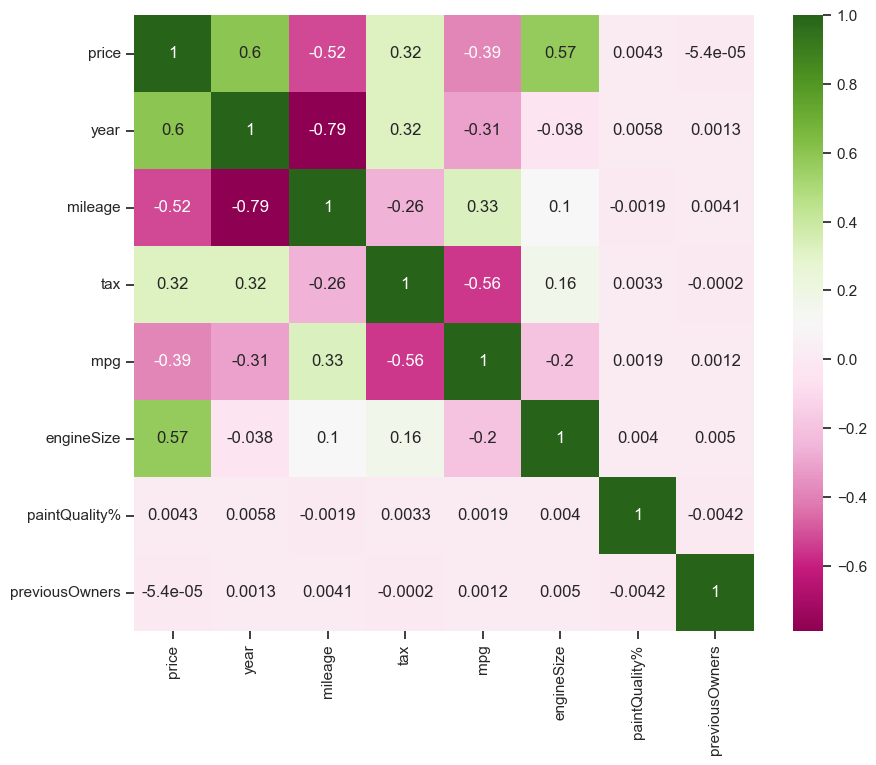

In [66]:
fig = plt.figure(figsize=(10, 8))
threshold = 0.3

corr = train[metric_features].corr(method="spearman")

annot = corr.round(2).astype(str)
annot_masked = annot.where(corr.abs() >= threshold, '') 

sns.heatmap(data=corr,annot= True, cmap = 'PiYG')

plt.show()

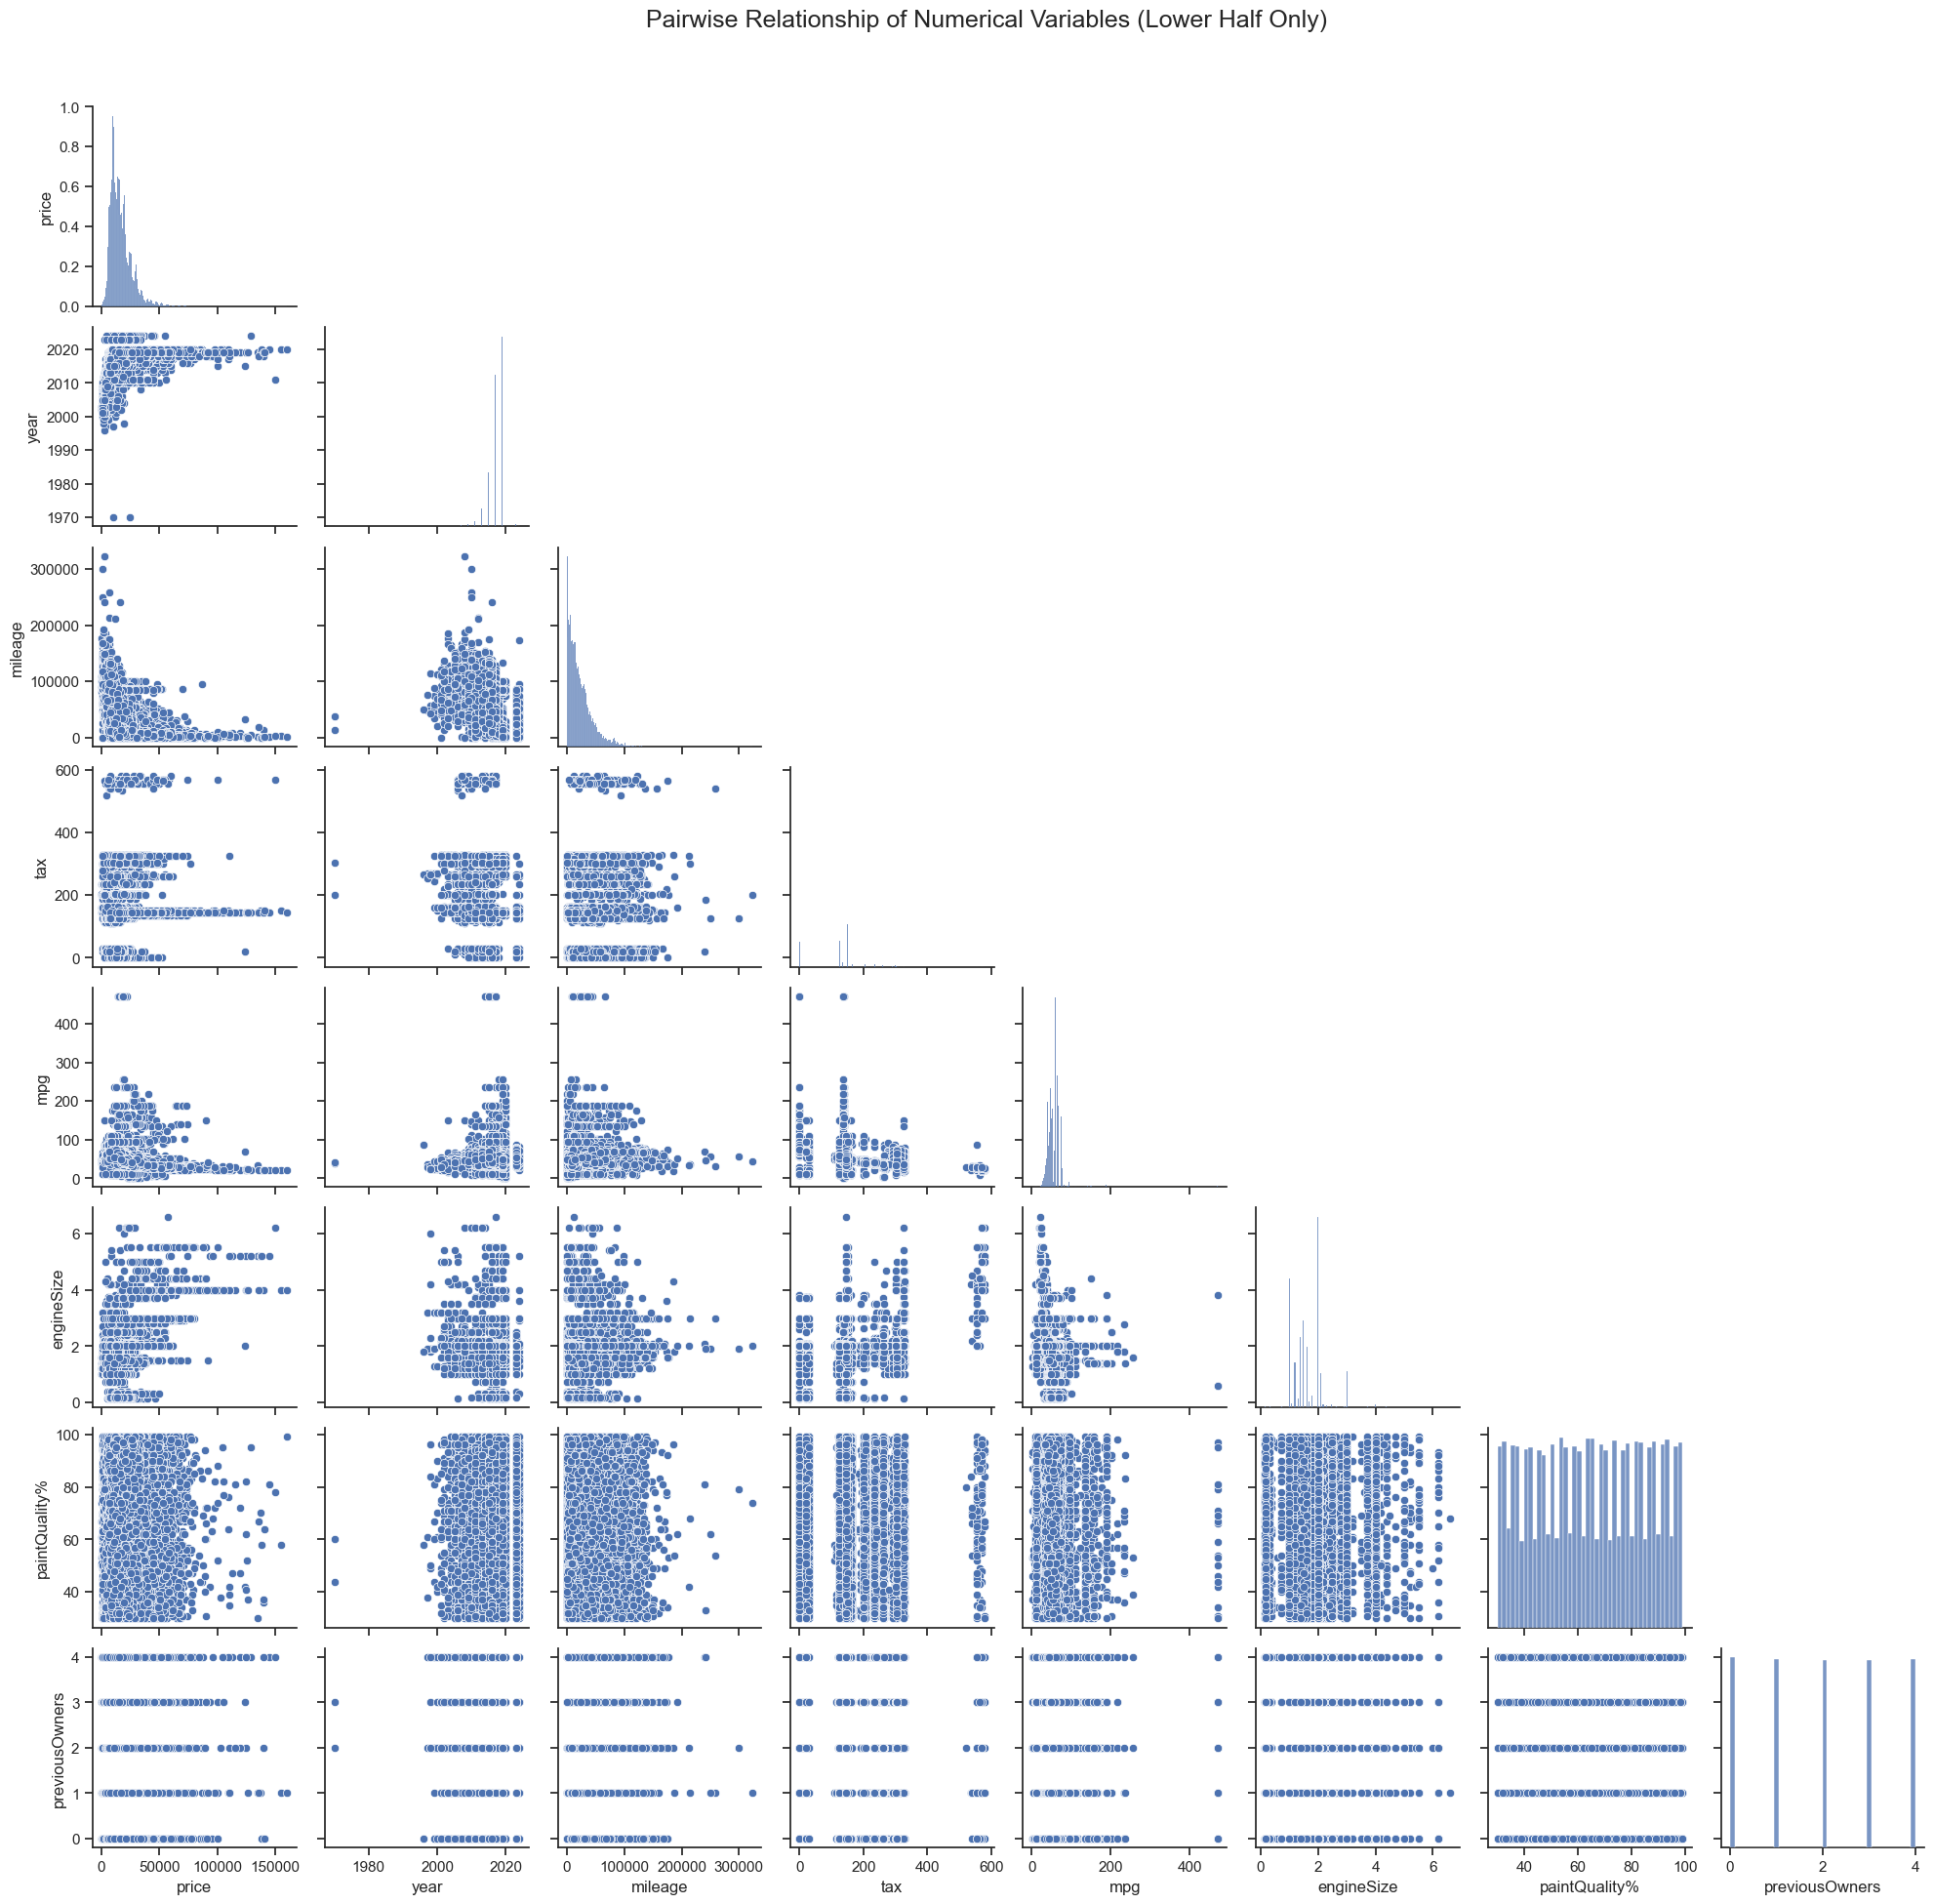

In [67]:
sns.set_style("ticks")

num_cols = len(metric_features)

g = sns.PairGrid(train[metric_features], diag_sharey=False)
g.map_lower(sns.scatterplot)
g.map_diag(sns.histplot, kde=False)

for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

plt.subplots_adjust(top=0.93)
g.fig.suptitle("Pairwise Relationship of Numerical Variables (Lower Half Only)", fontsize=18)

plt.show()

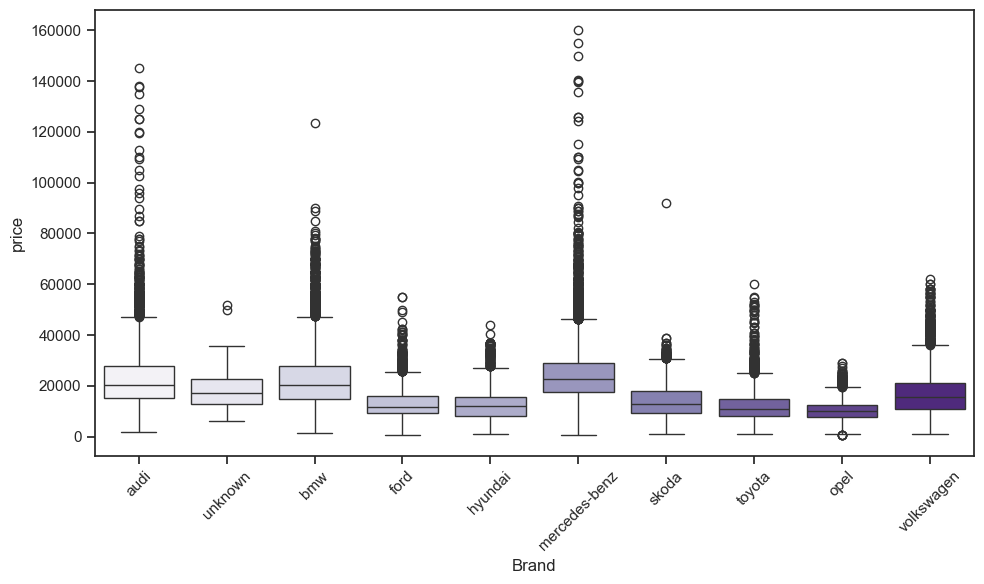

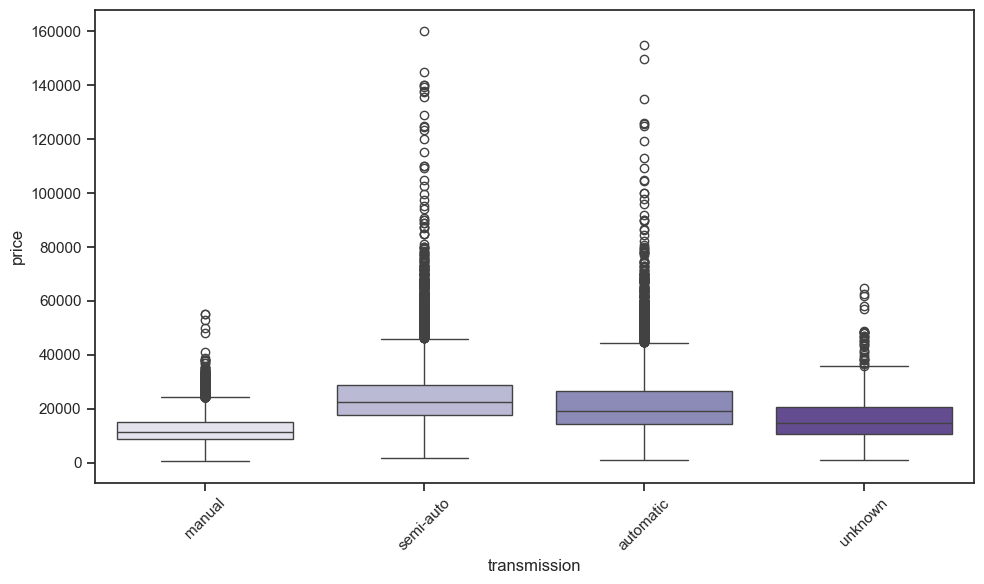

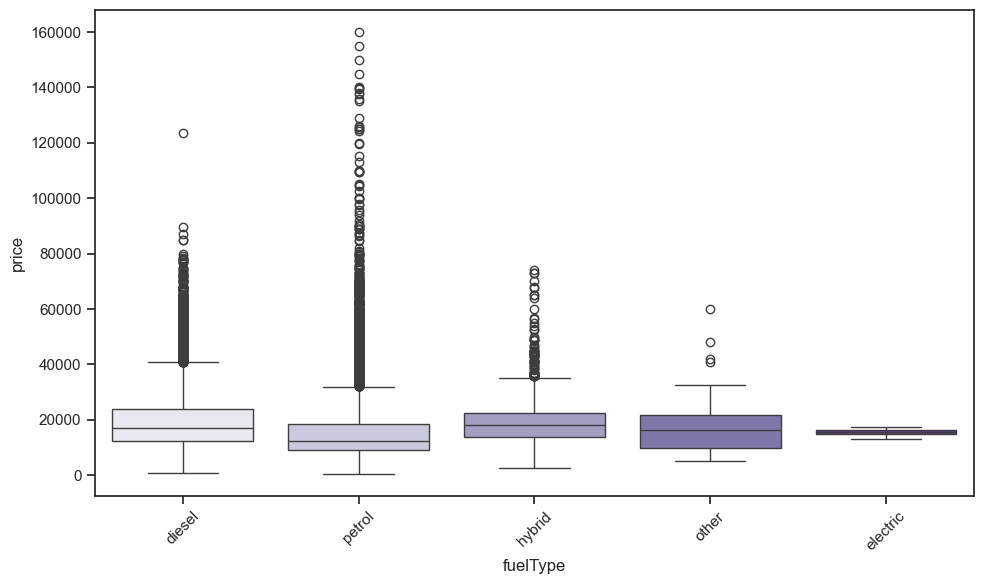

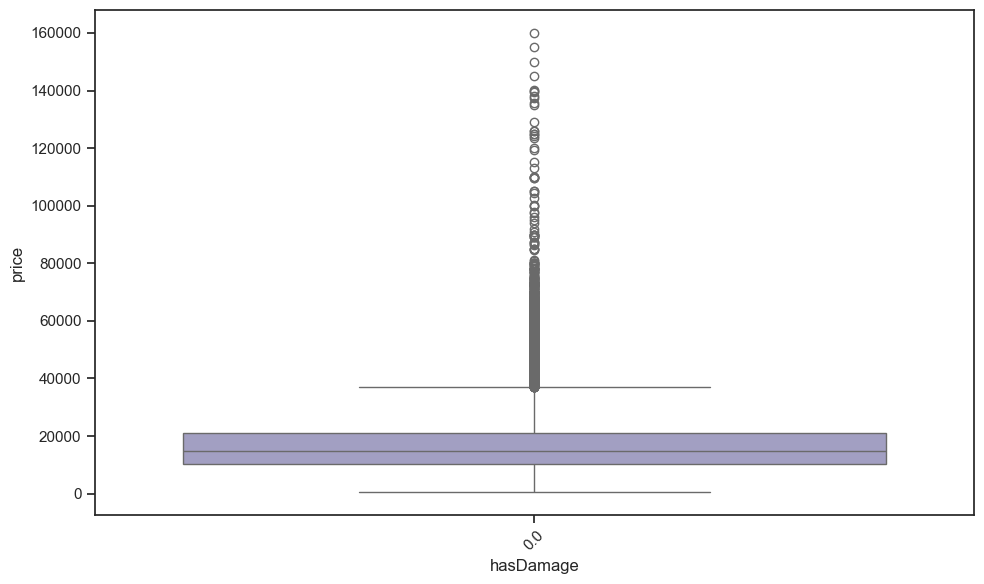

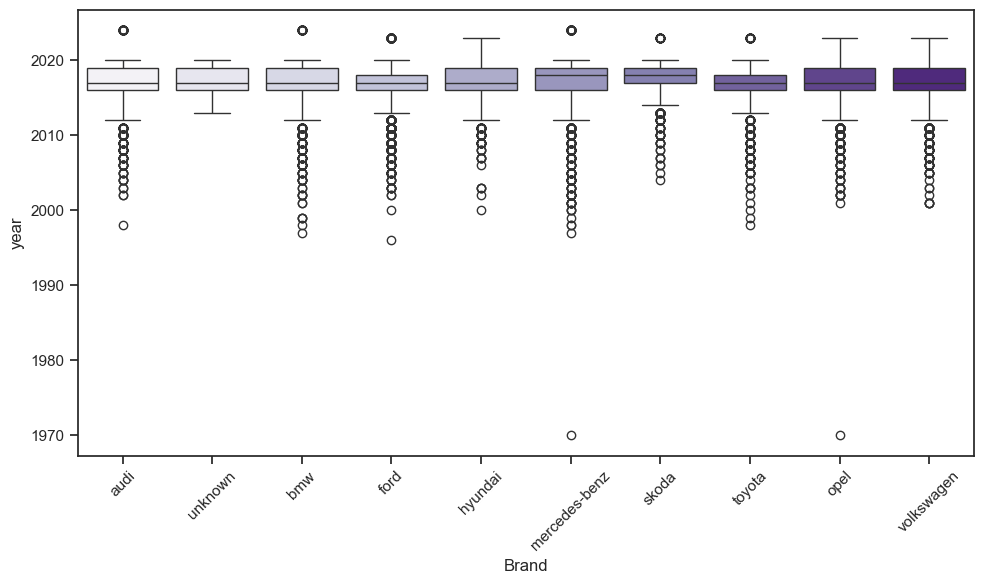

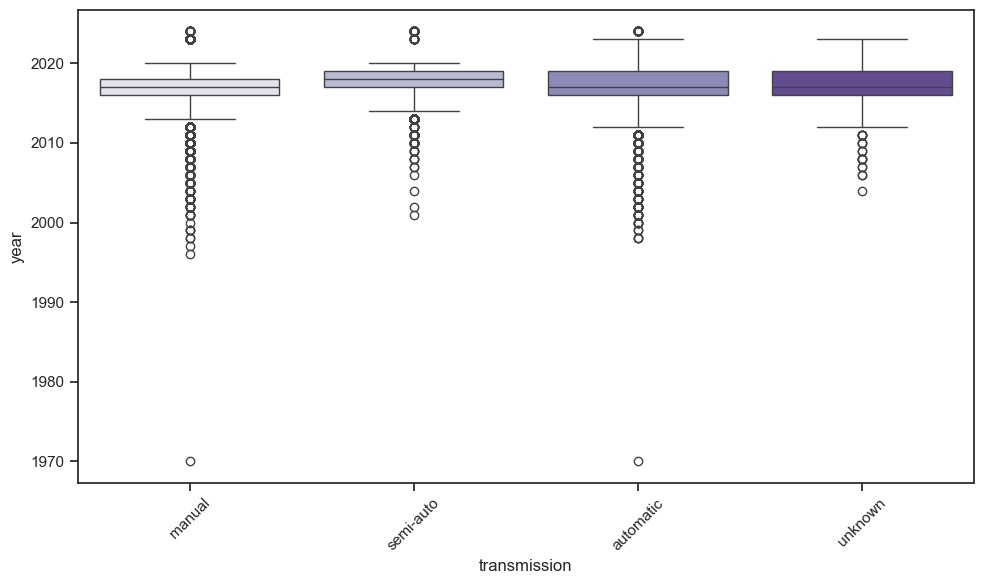

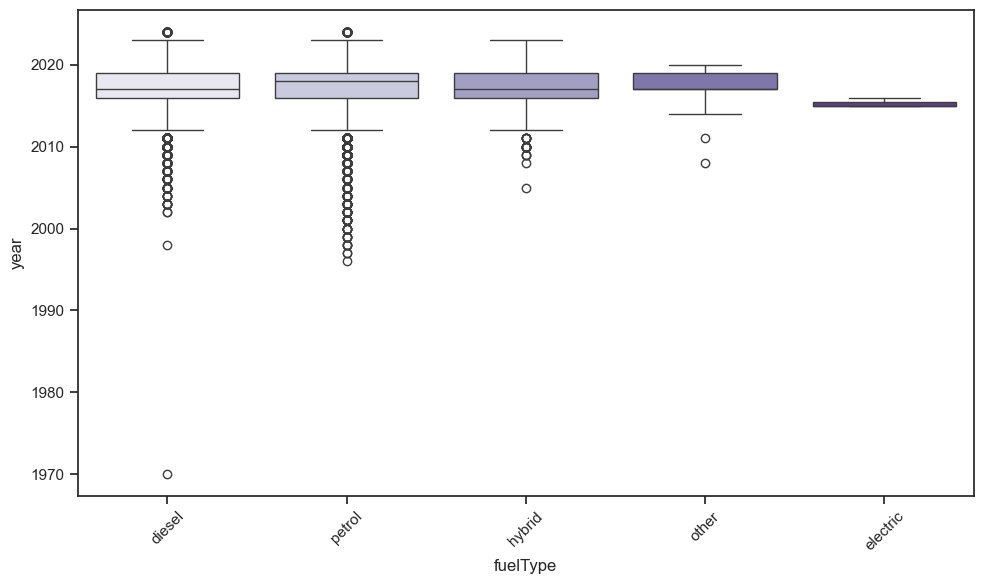

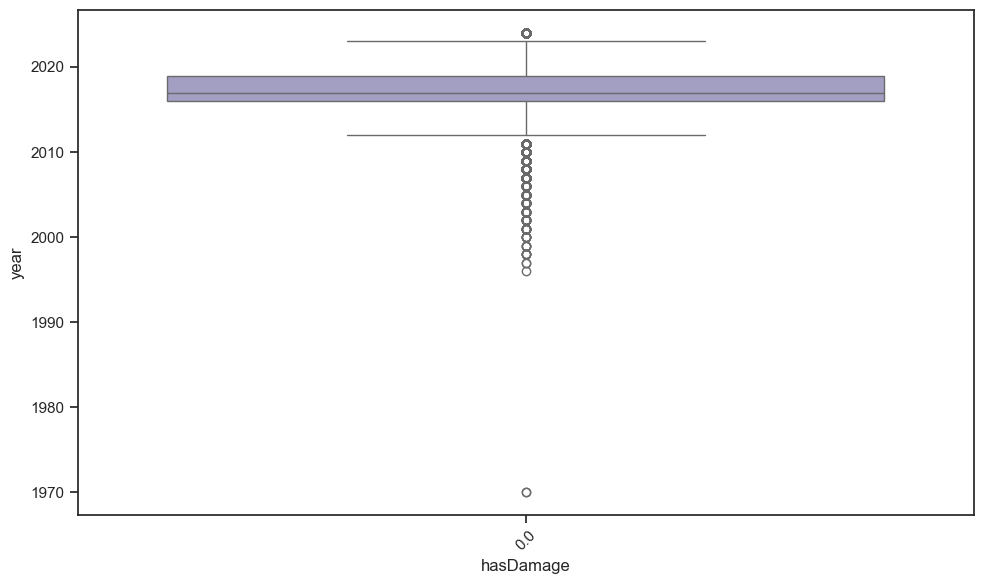

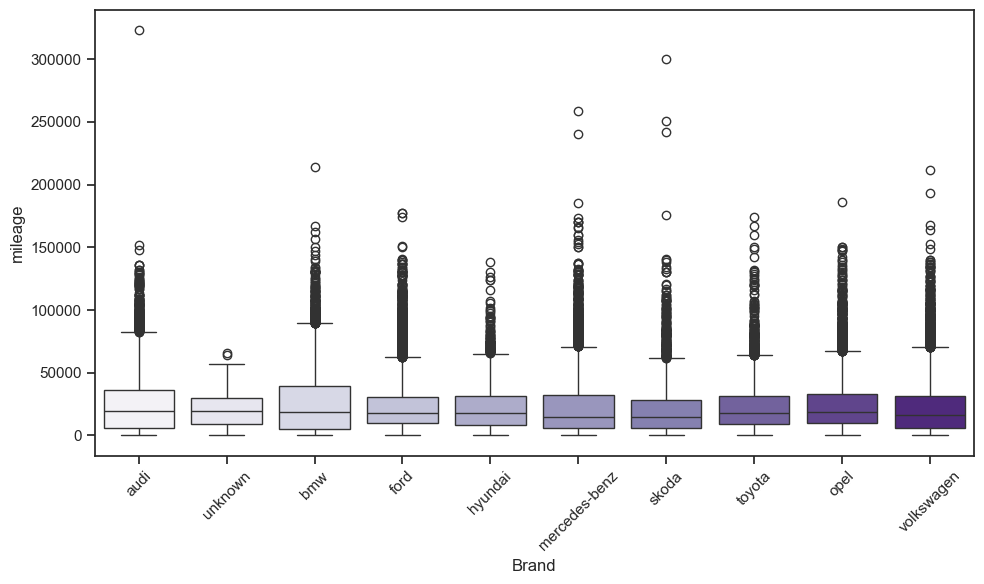

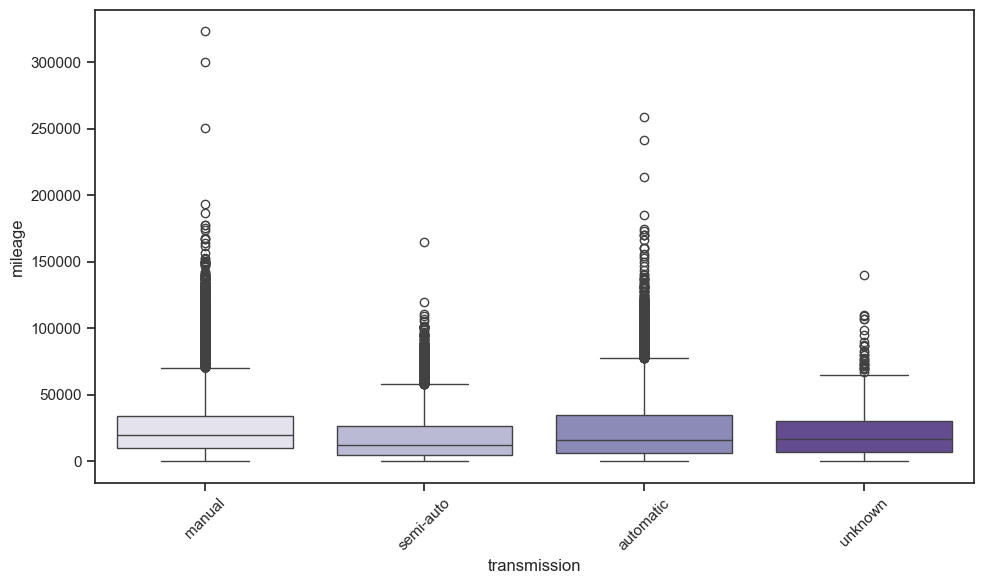

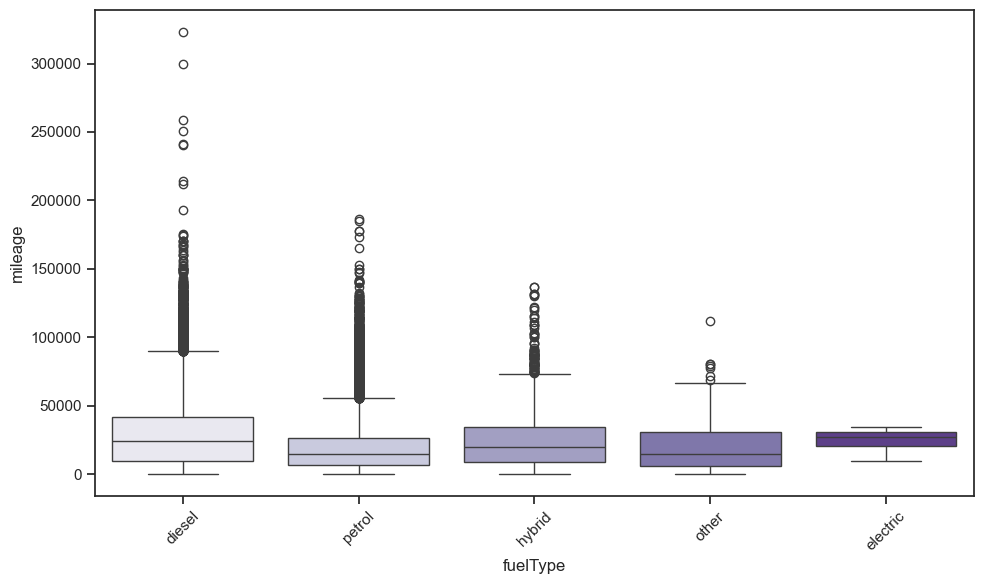

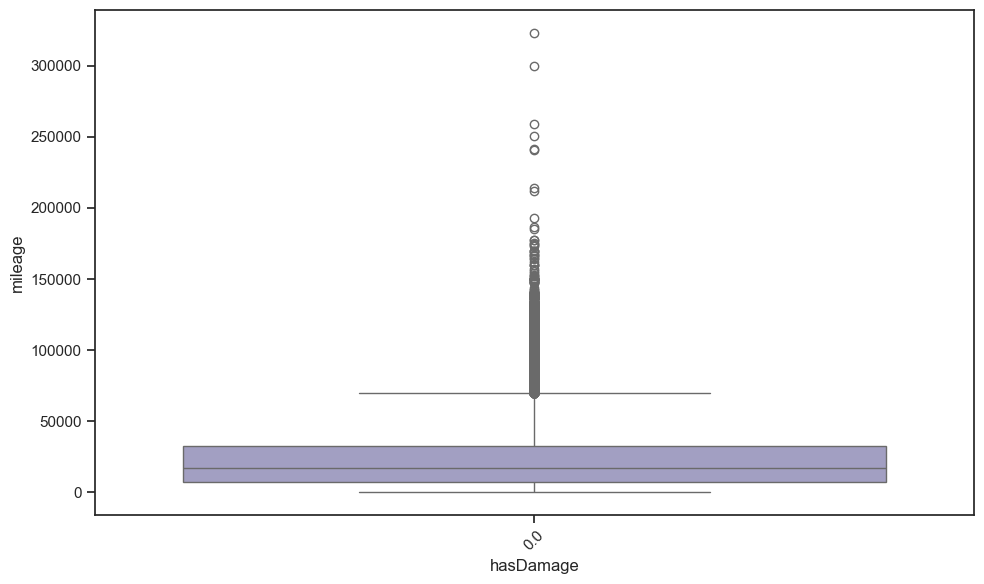

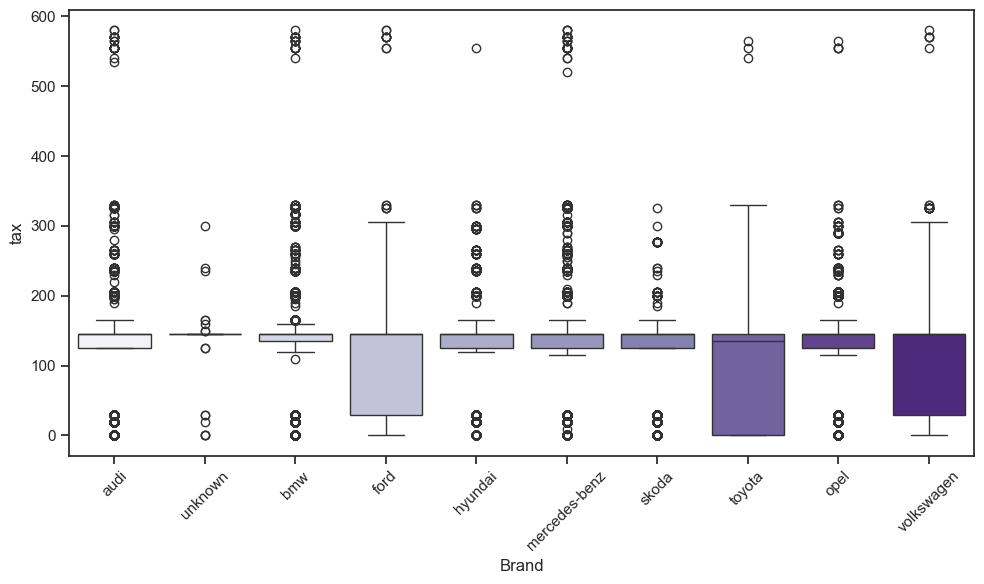

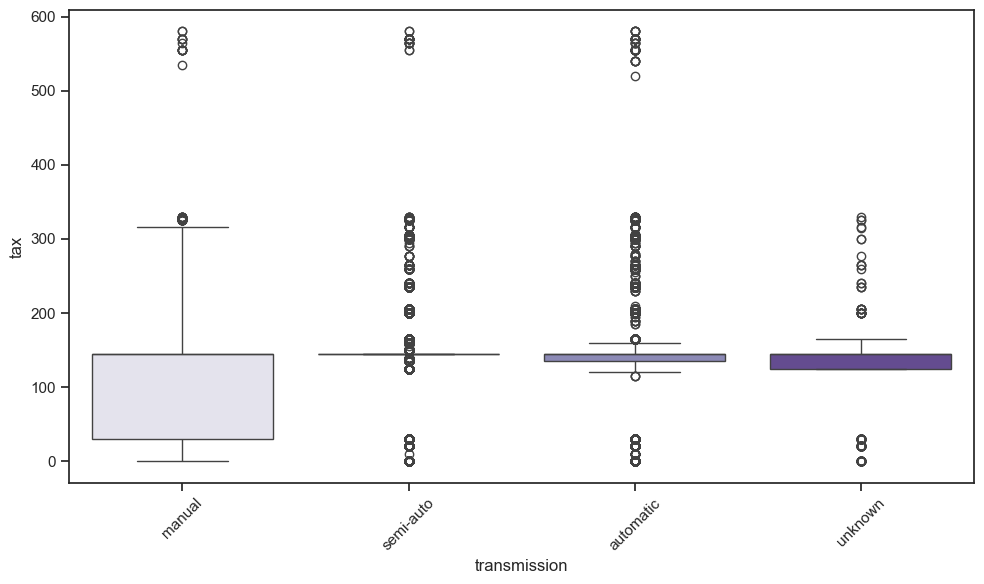

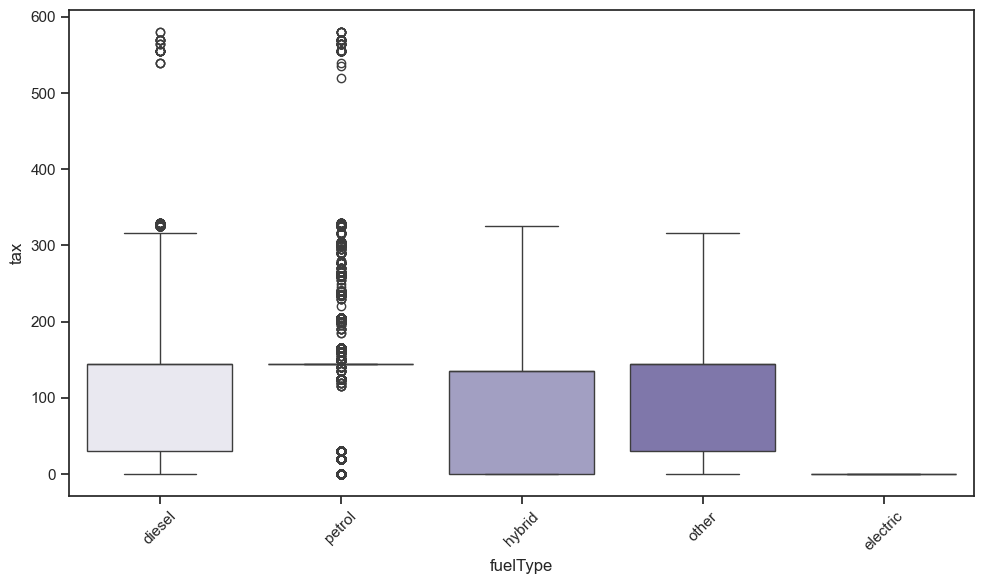

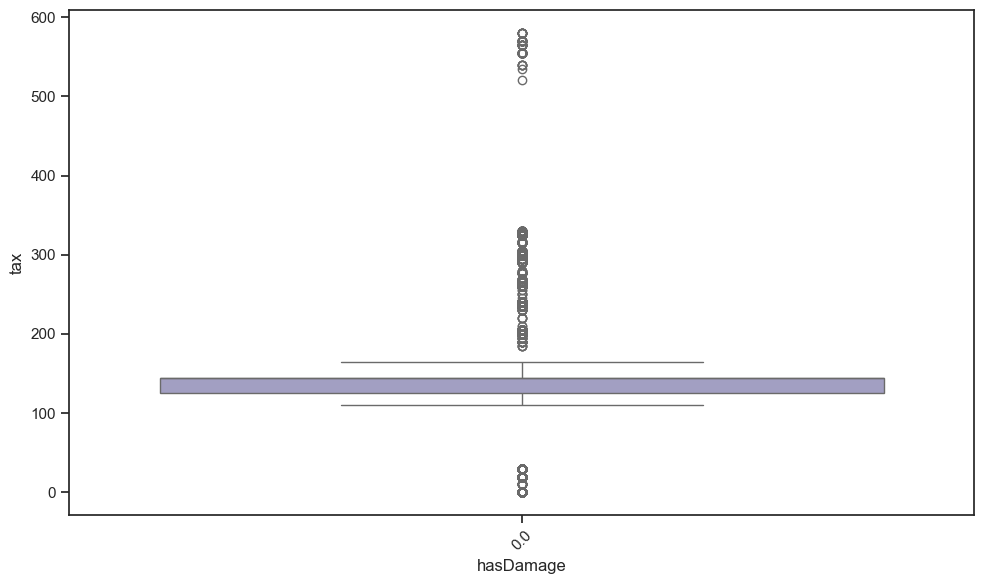

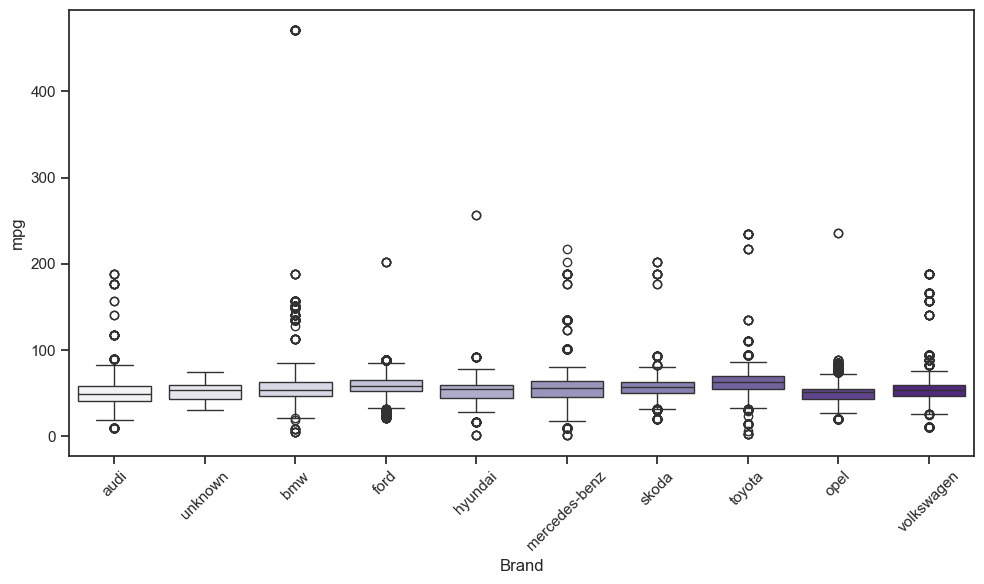

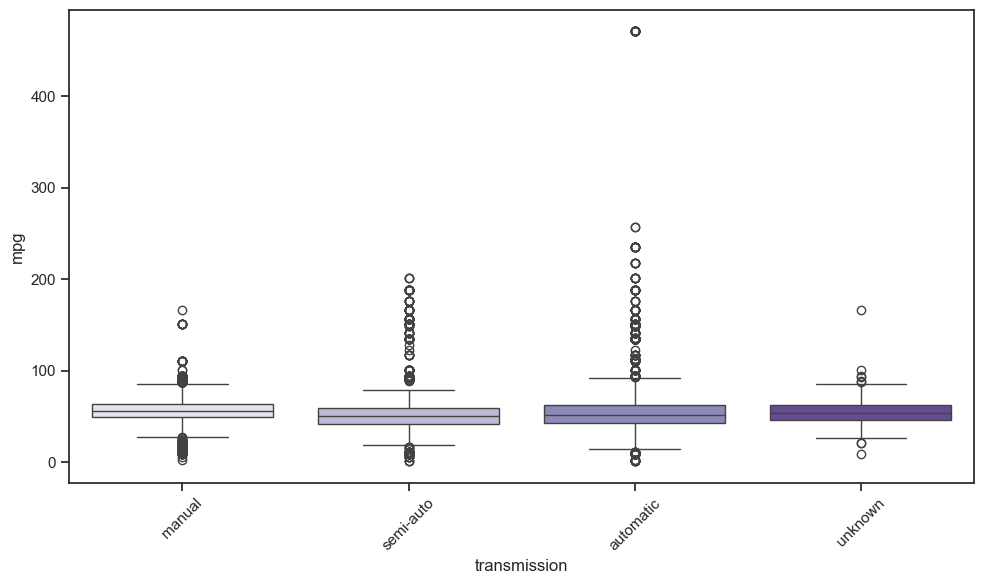

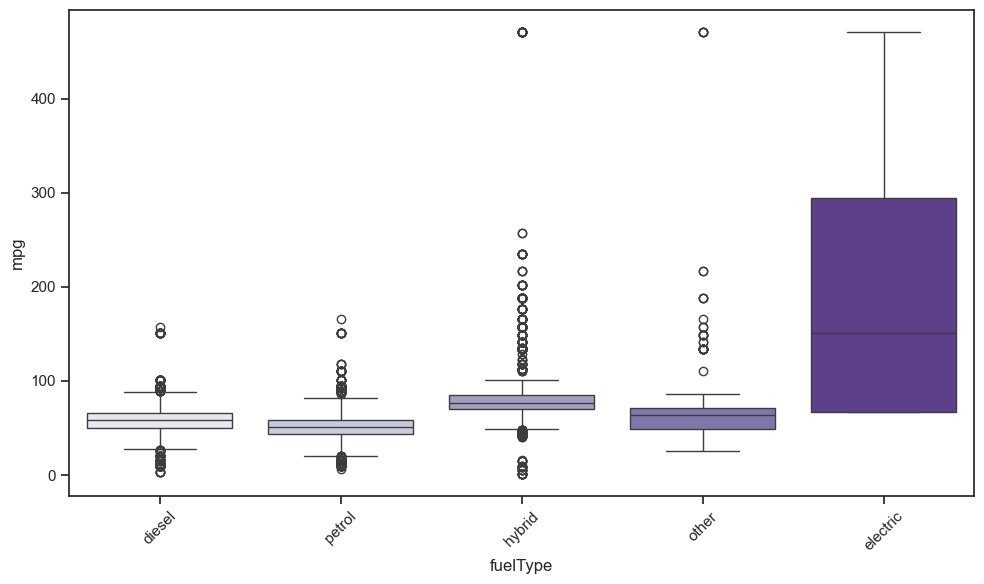

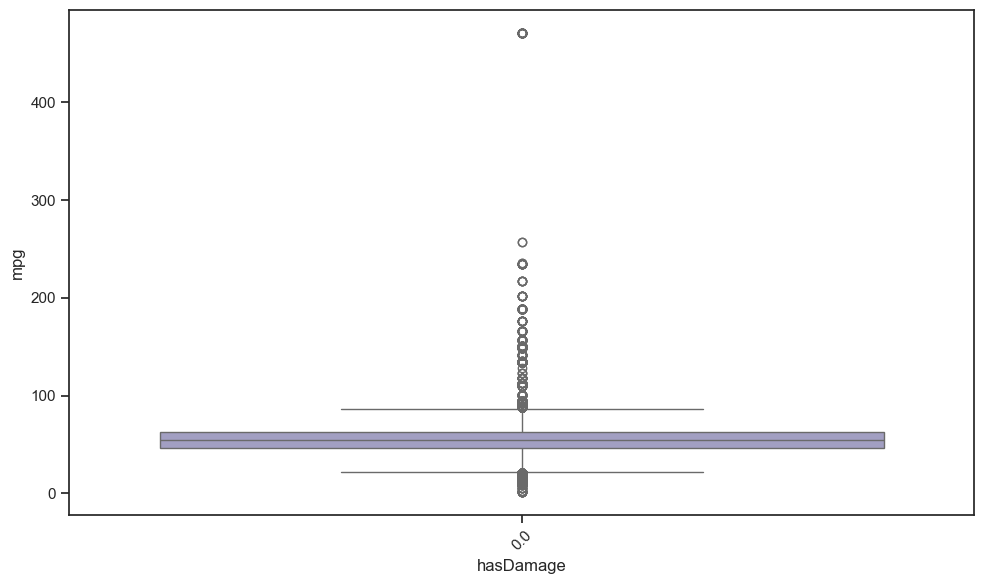

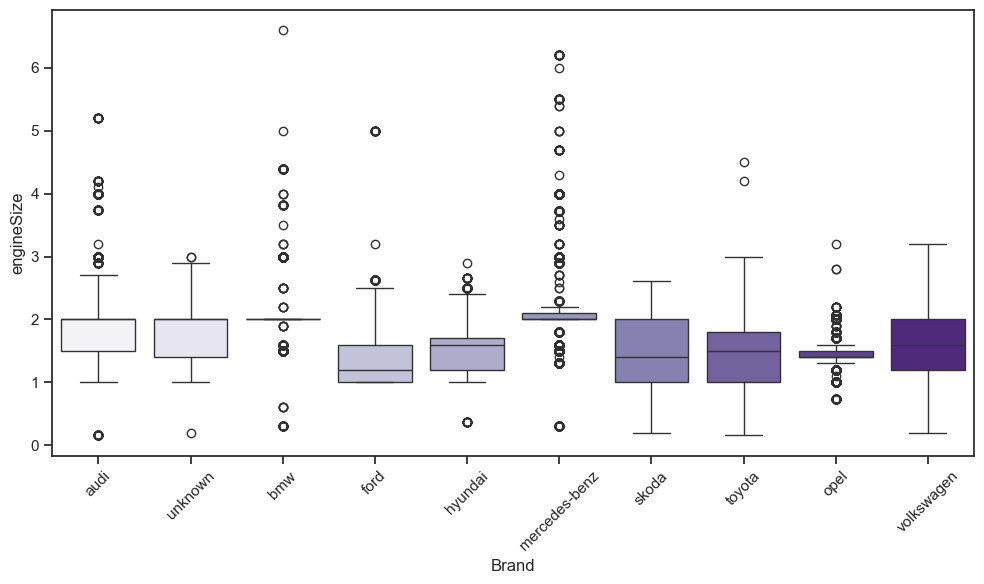

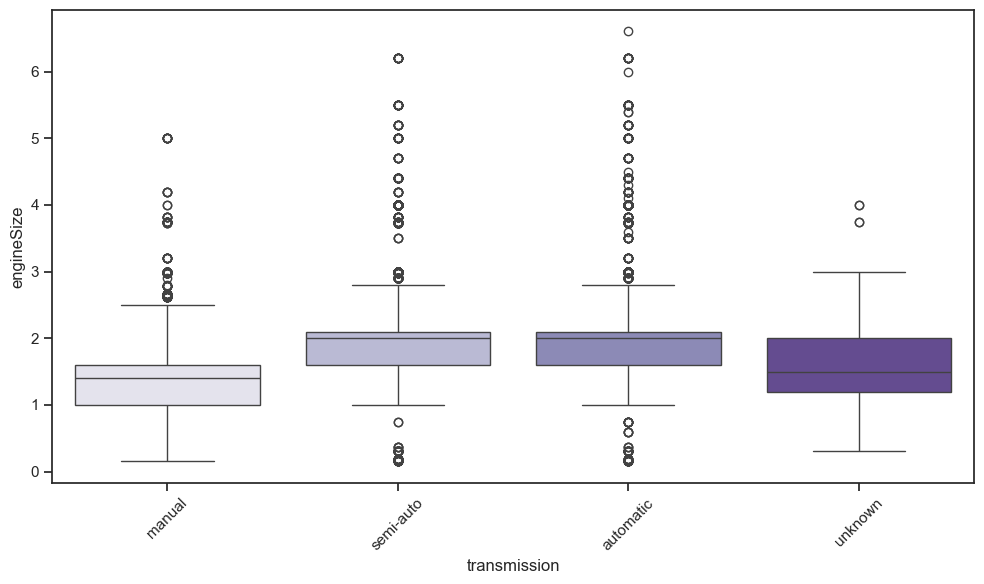

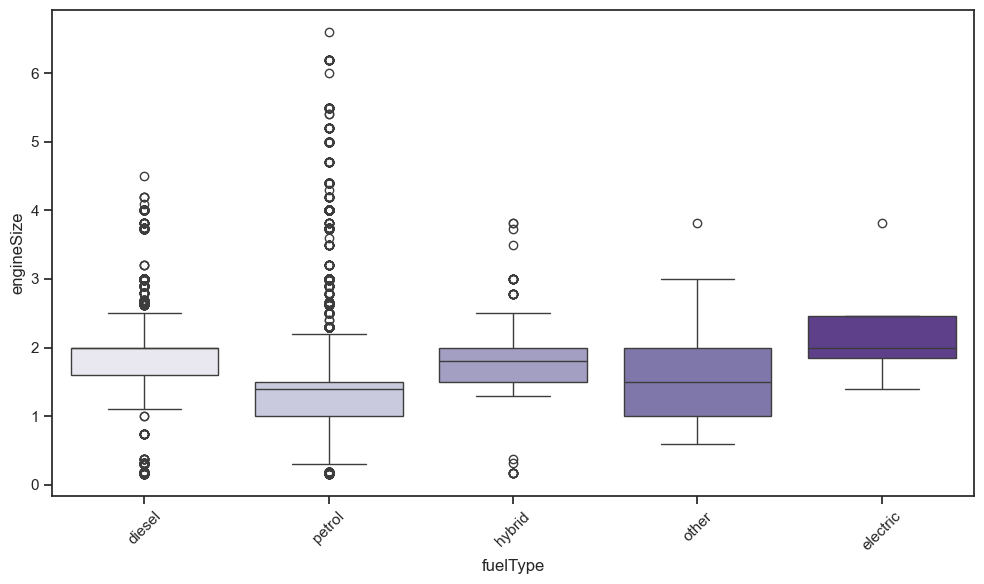

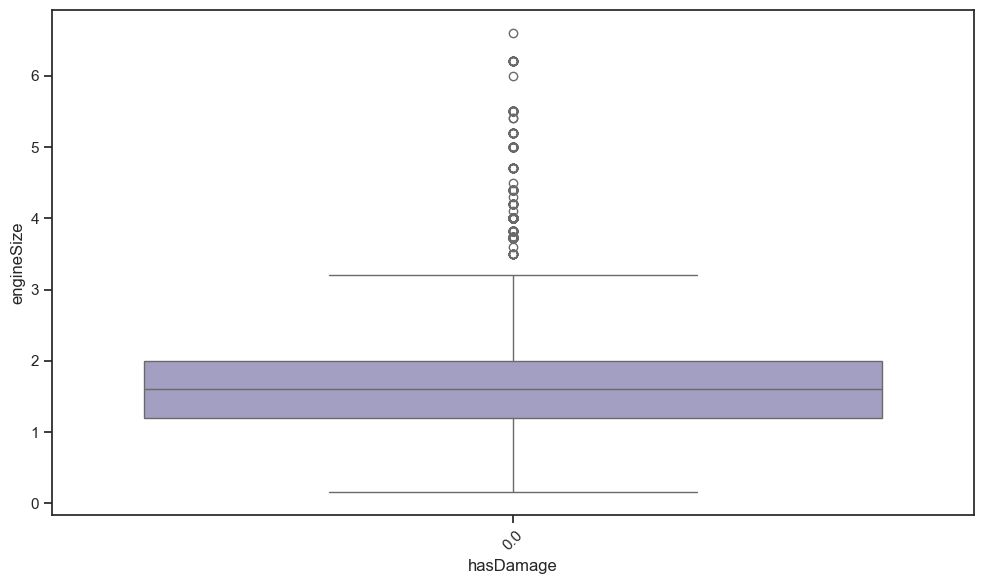

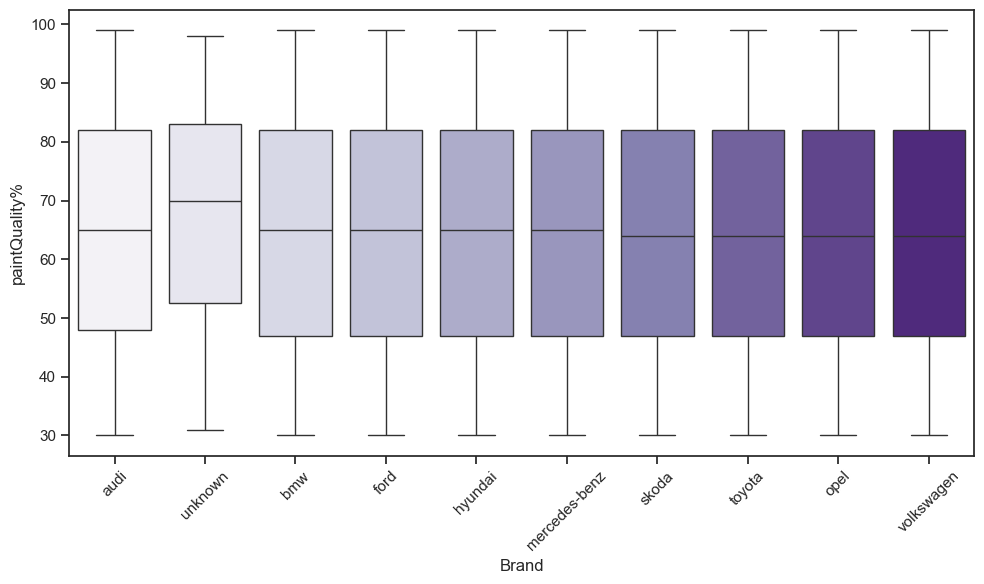

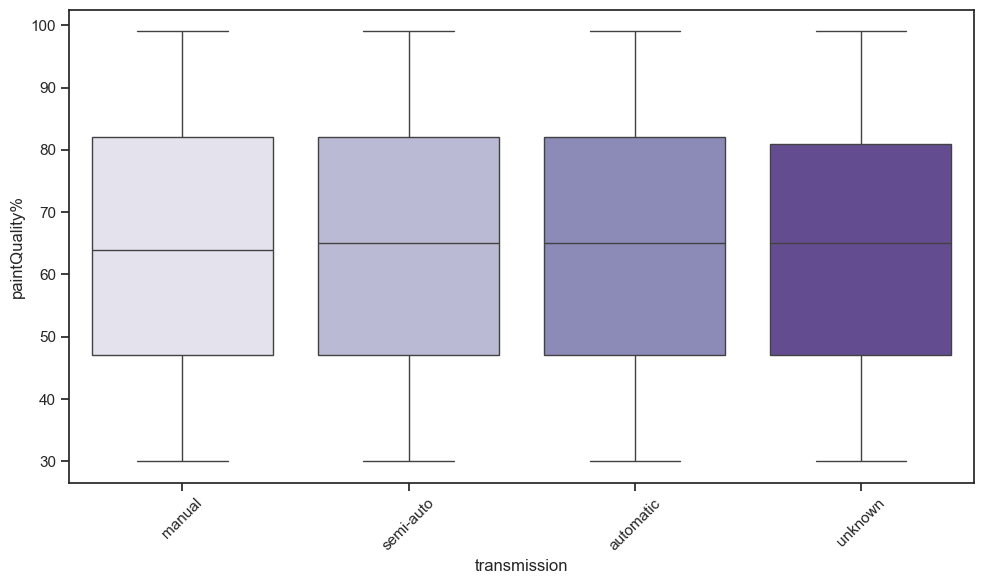

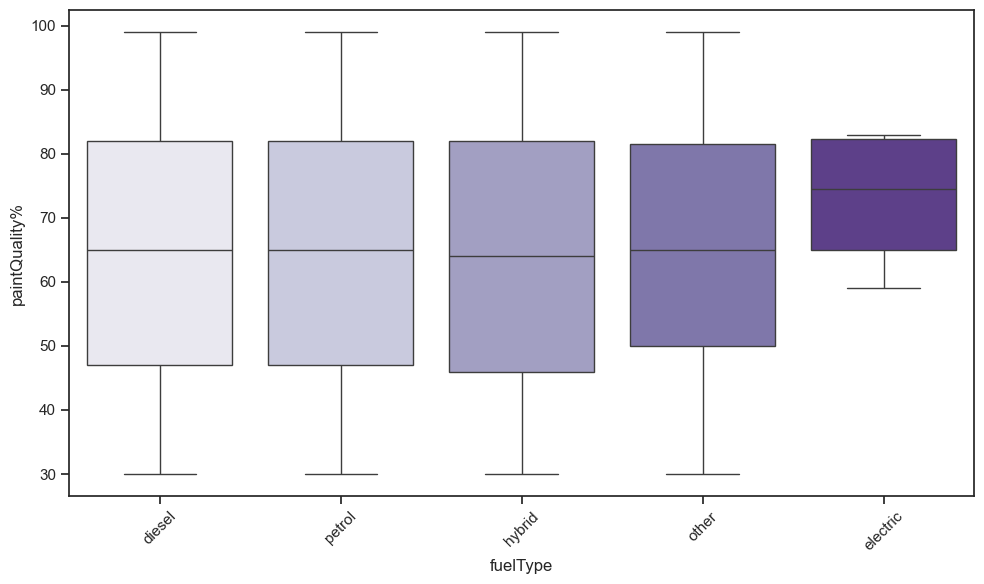

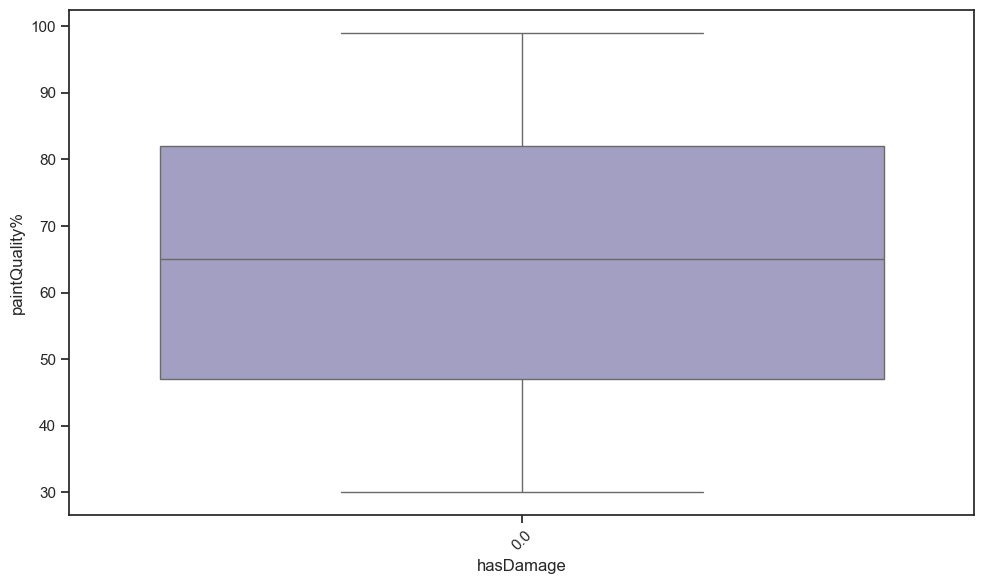

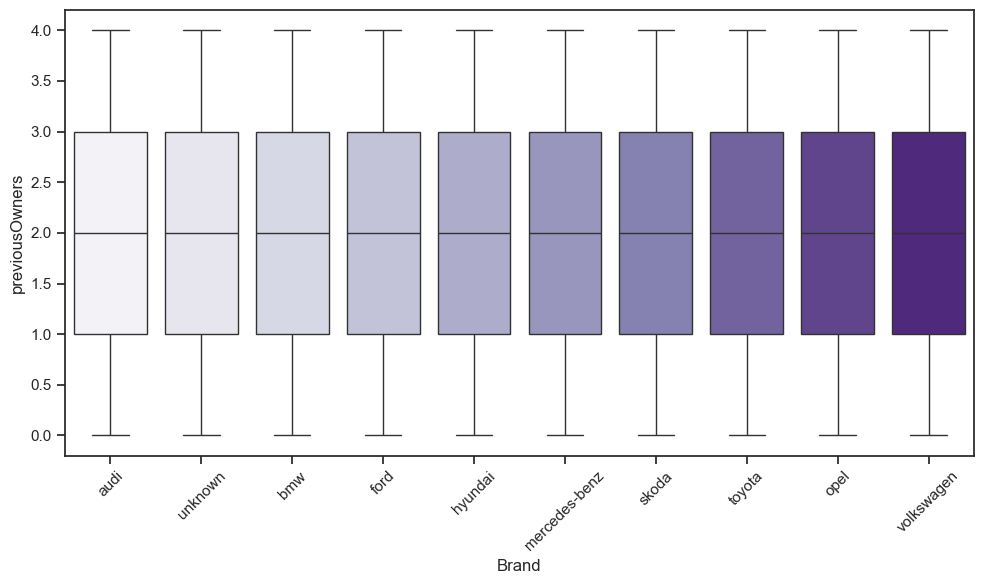

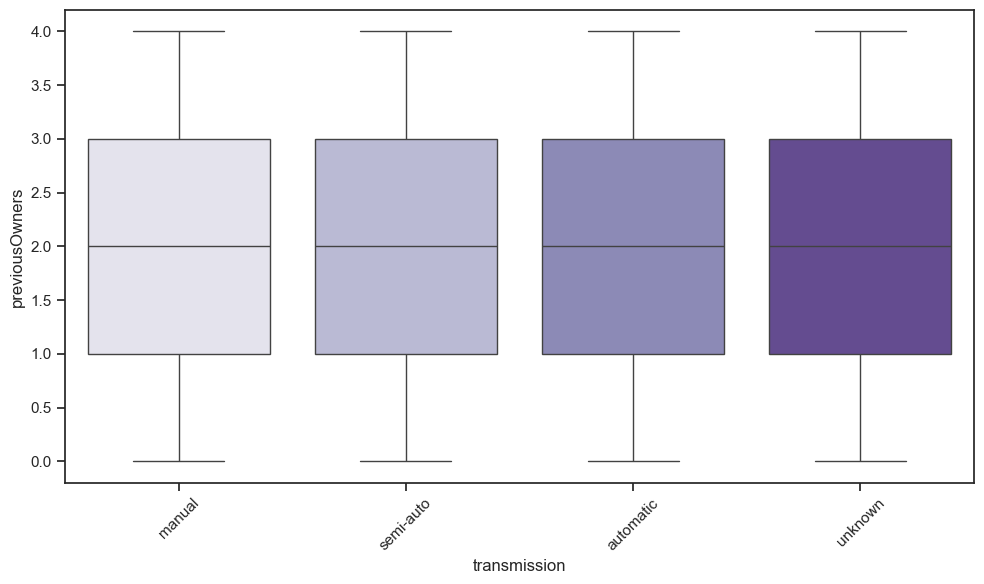

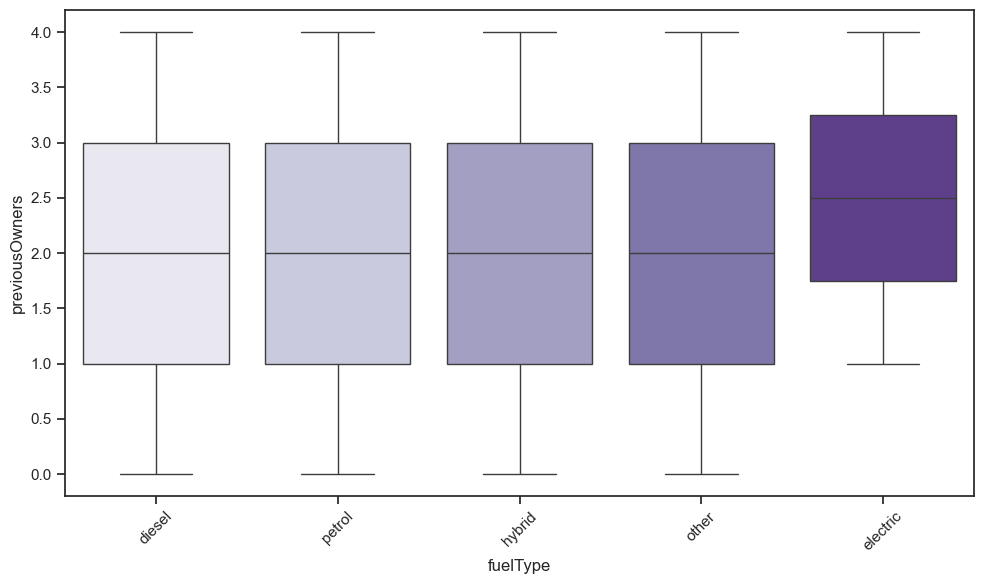

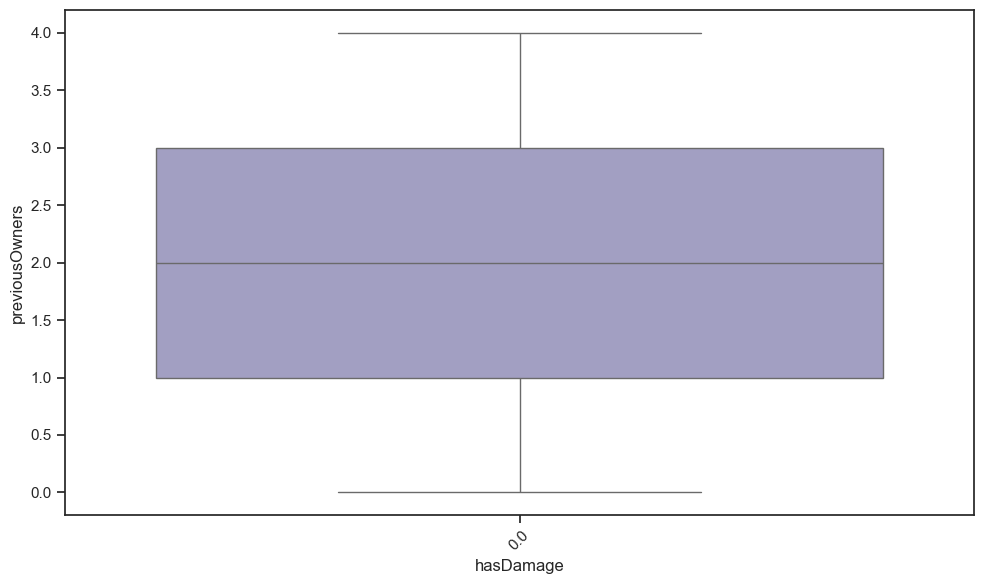

In [68]:
for column in metric_features:
    for x in [f for f in non_metric_features if f != 'model']:
        comparative_boxplot(train, x, column)


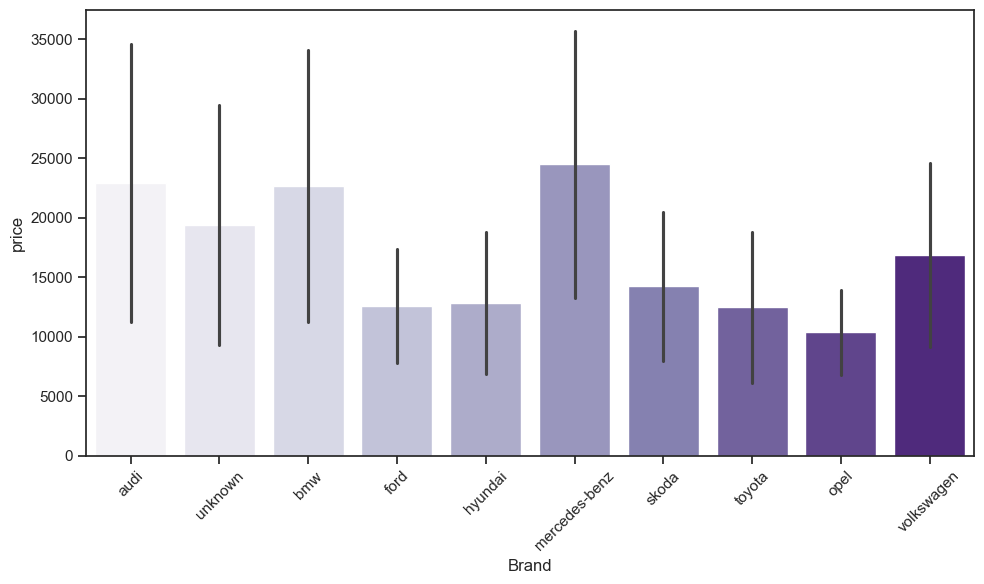

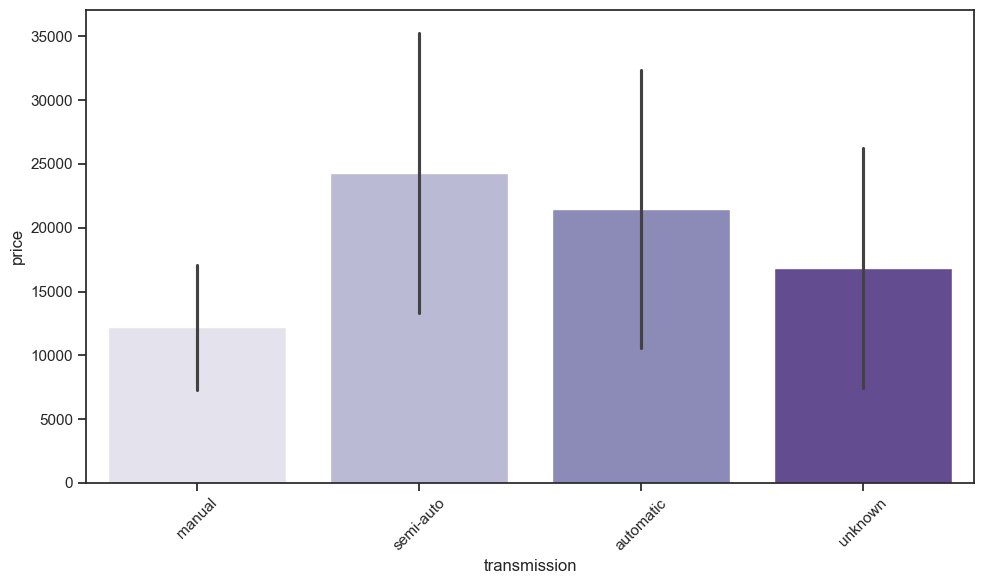

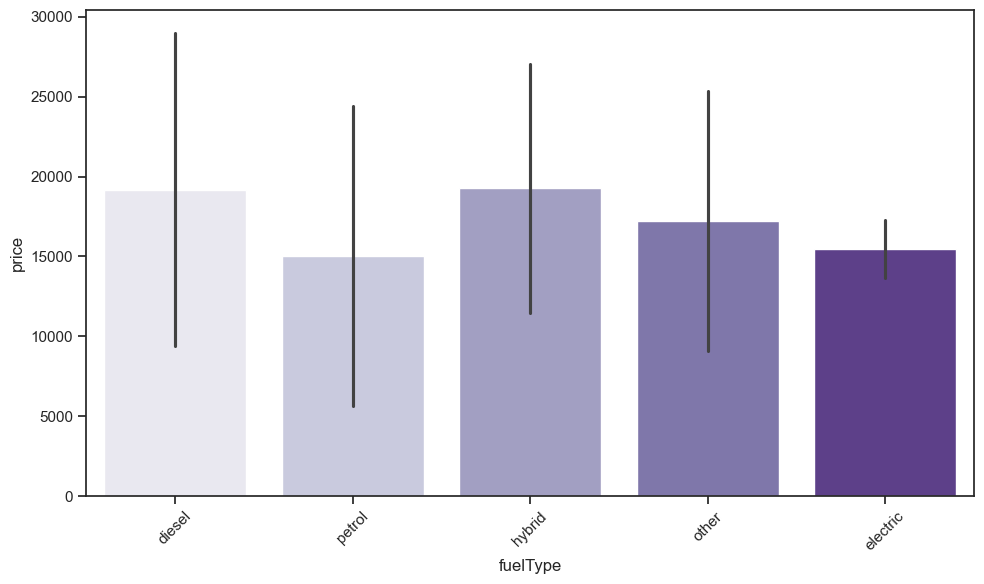

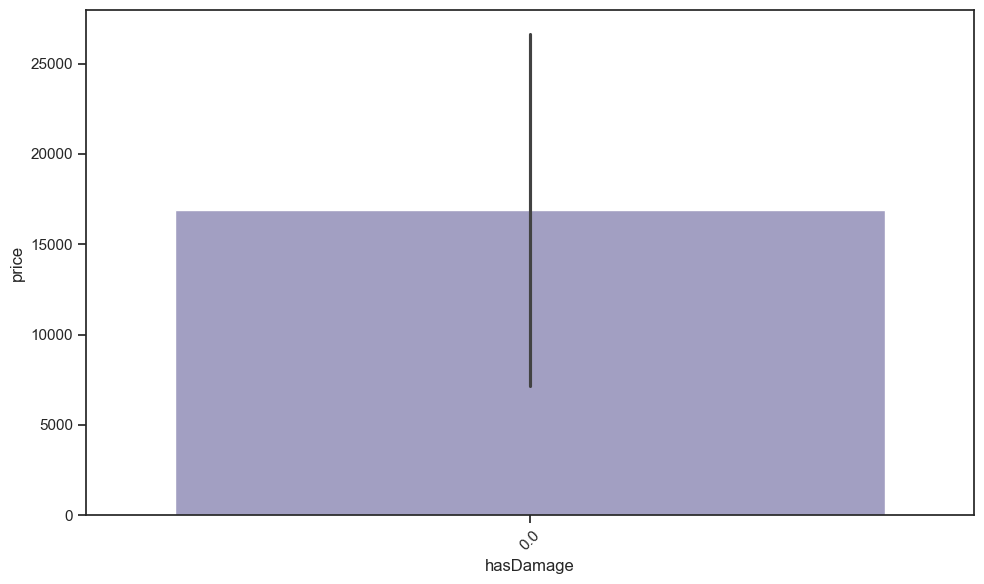

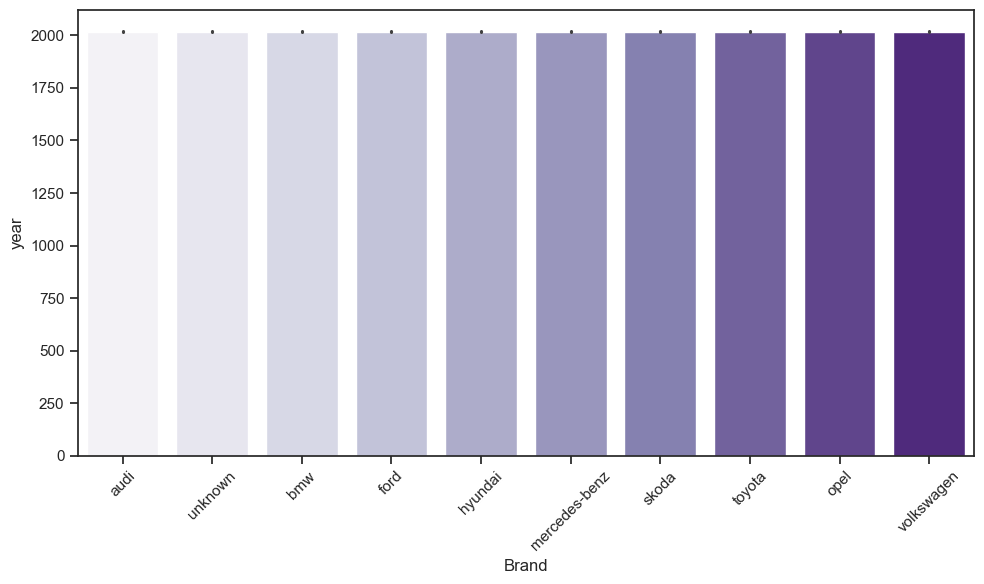

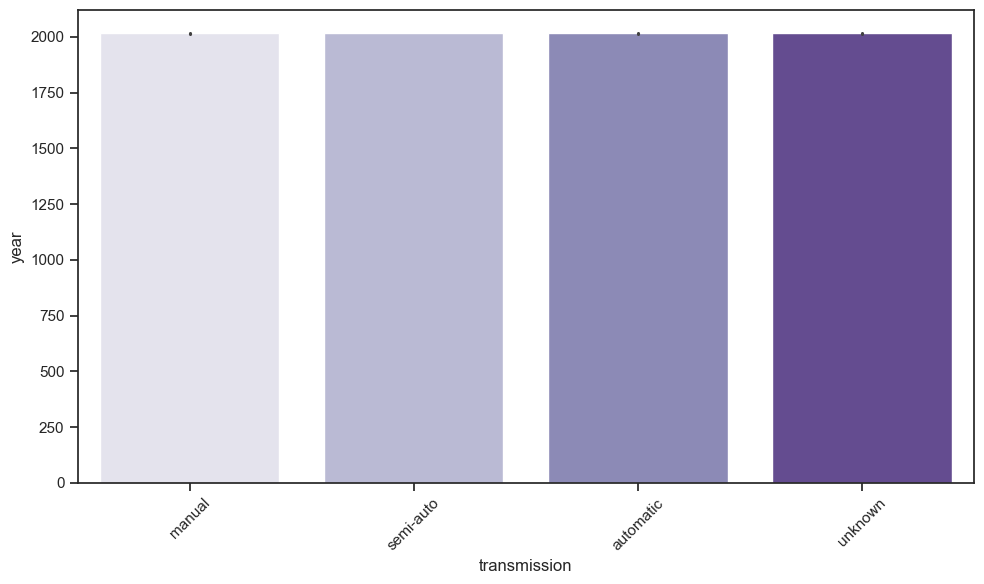

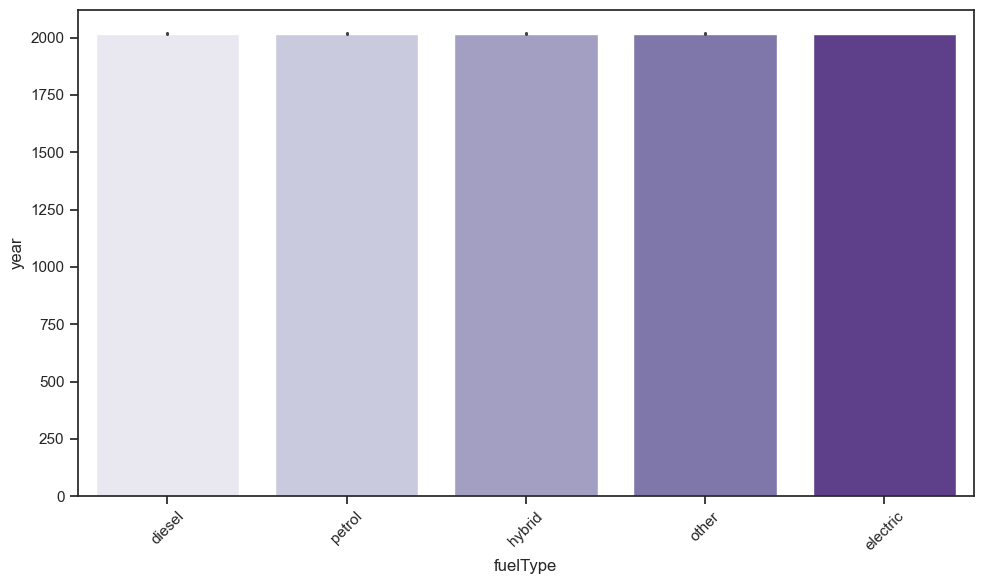

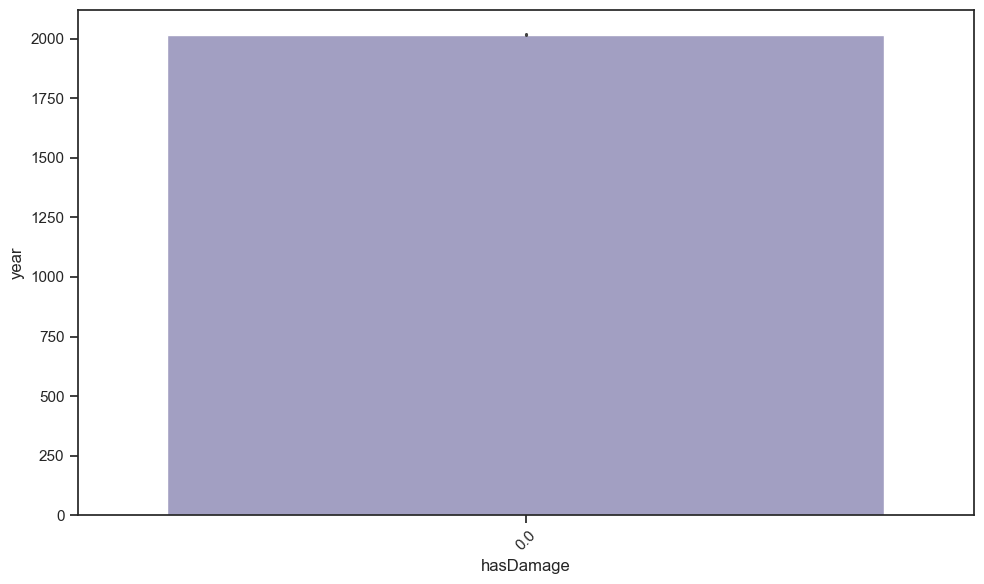

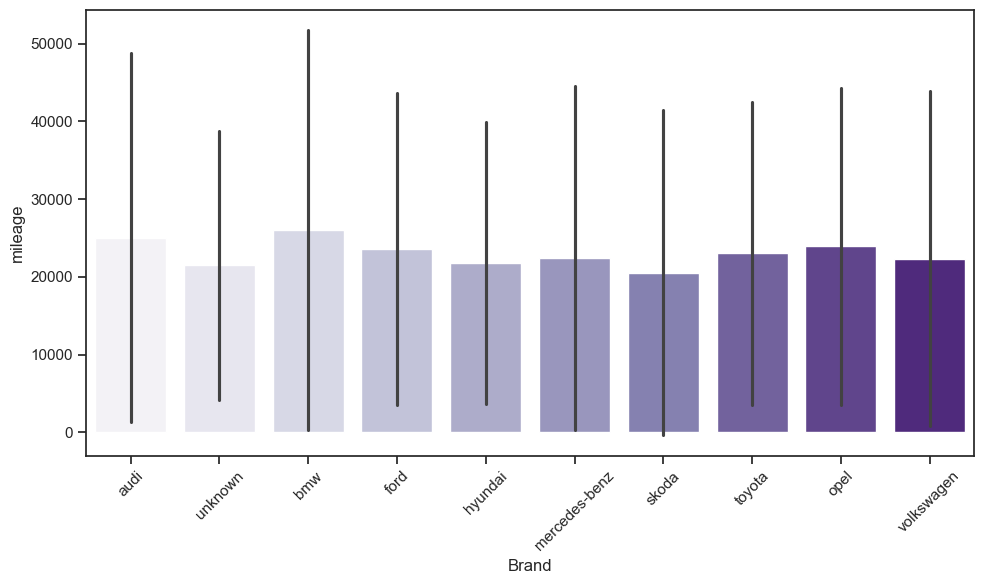

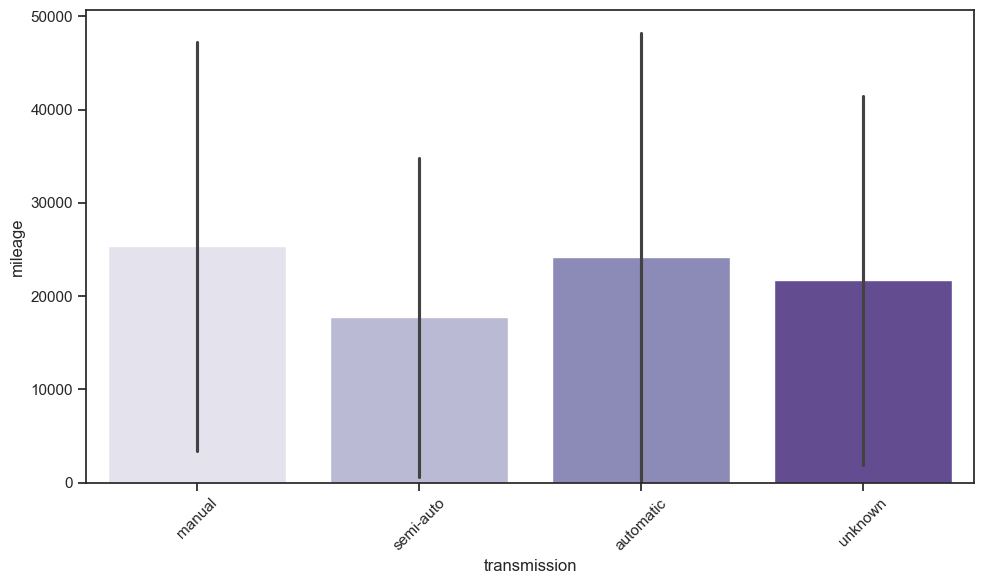

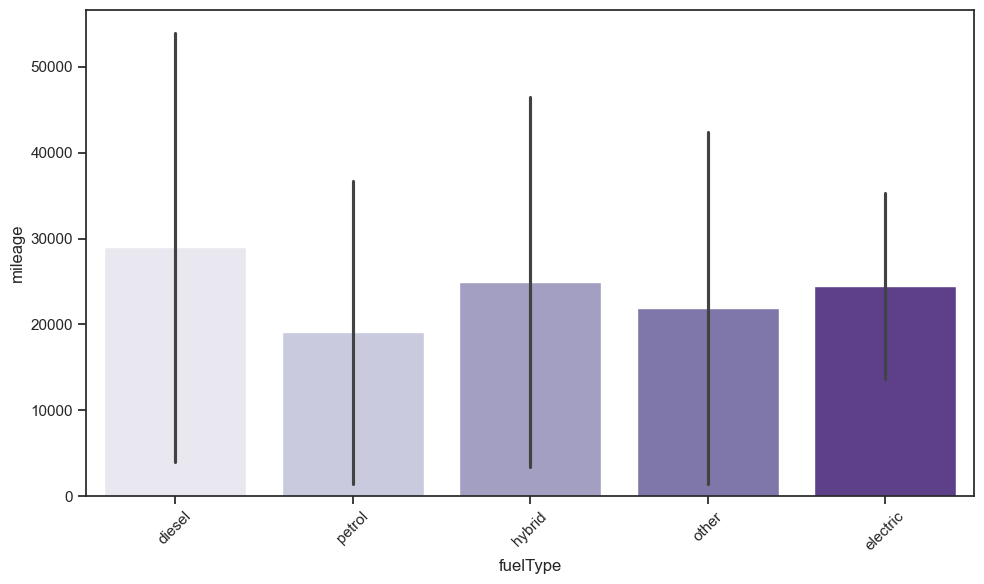

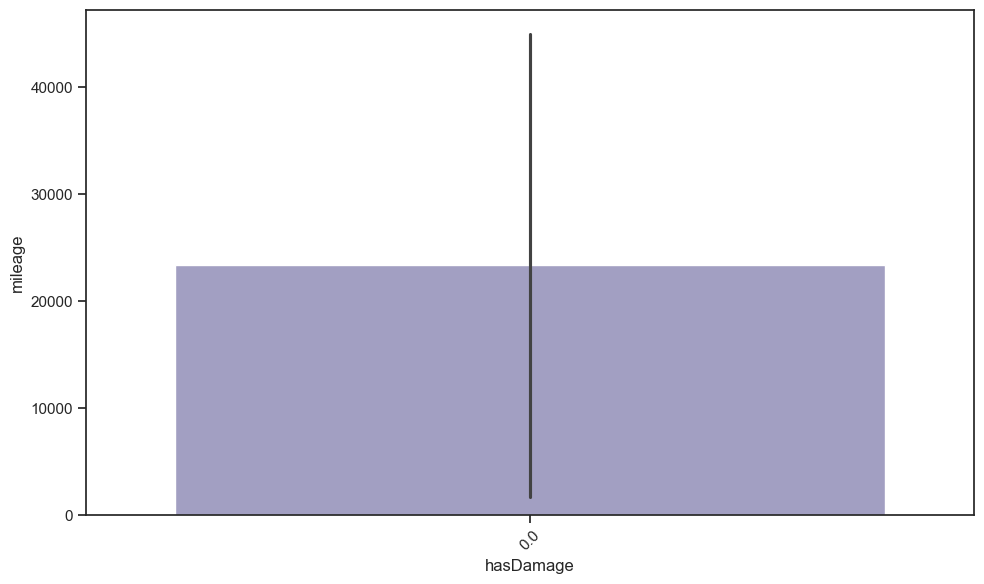

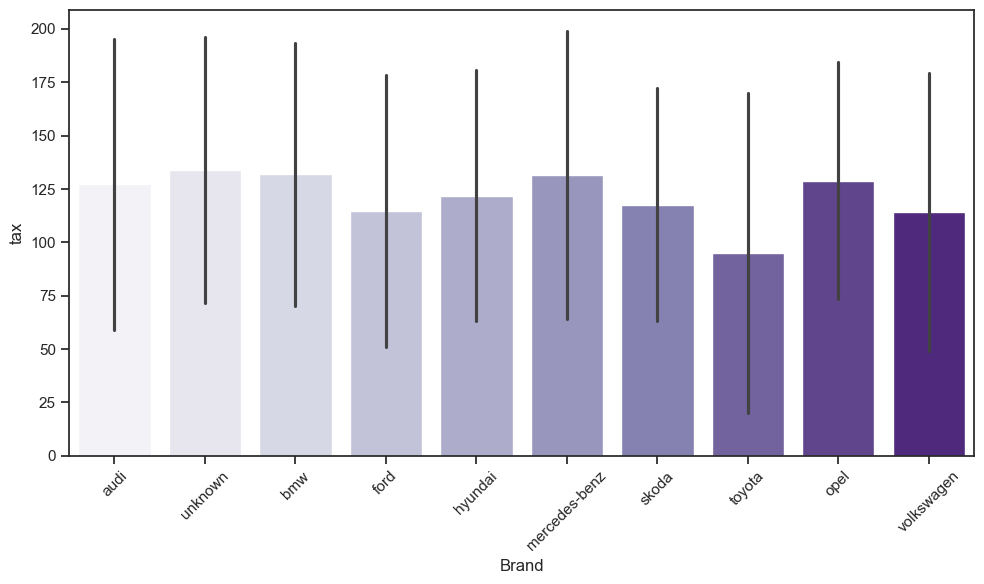

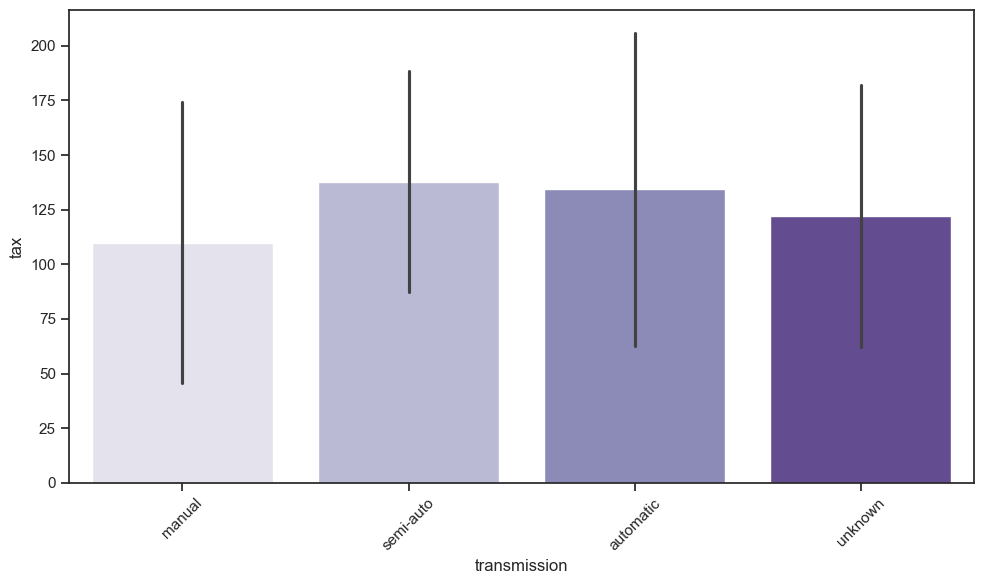

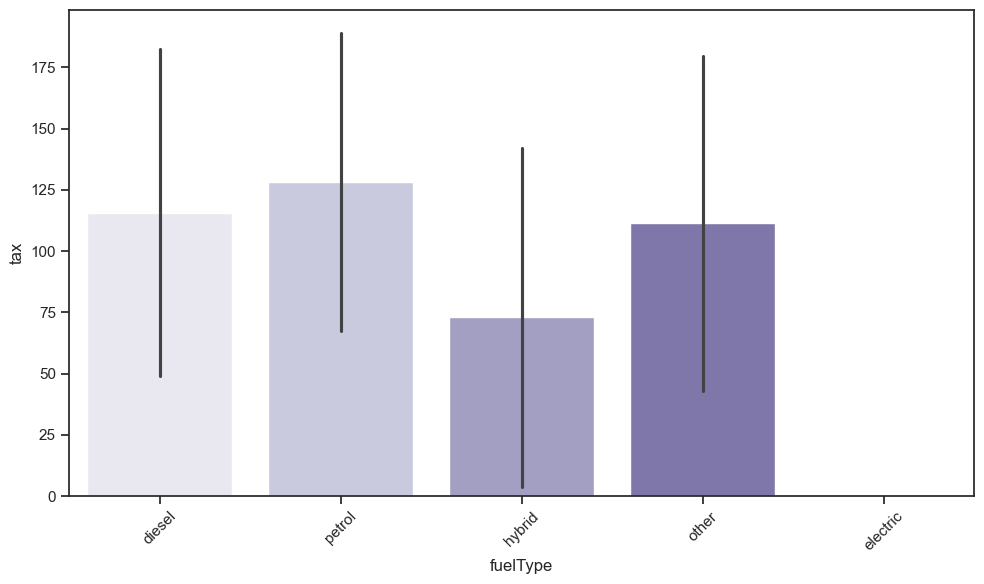

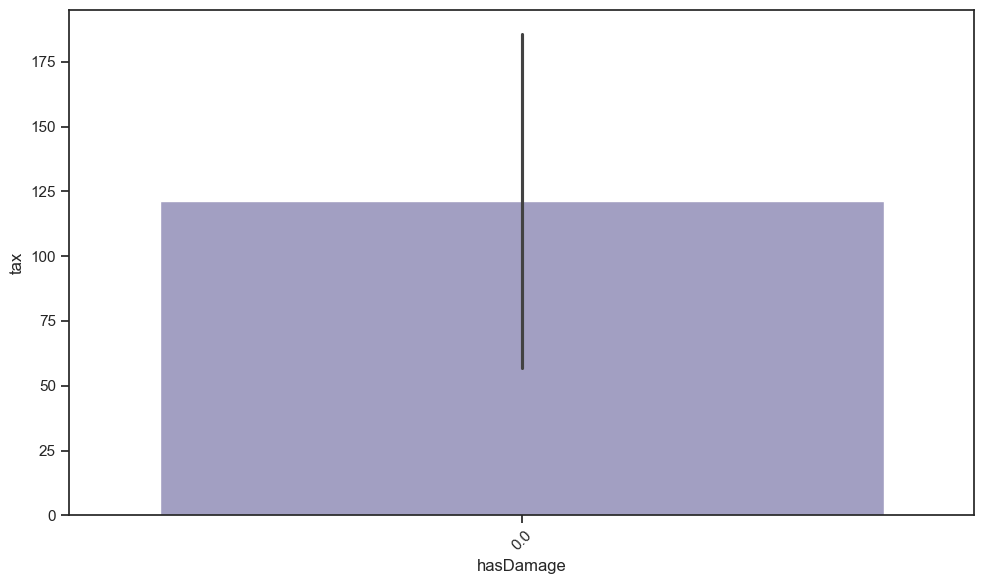

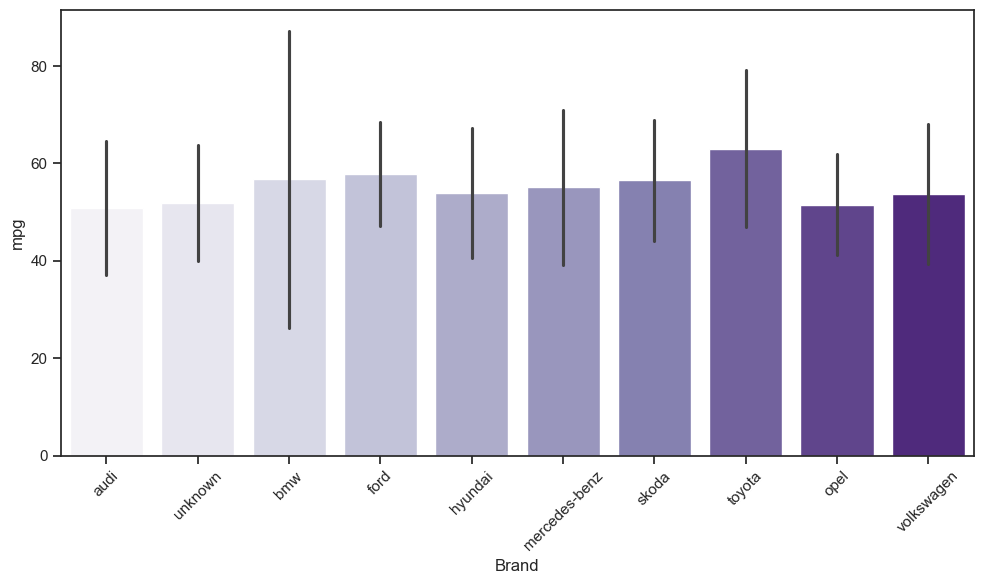

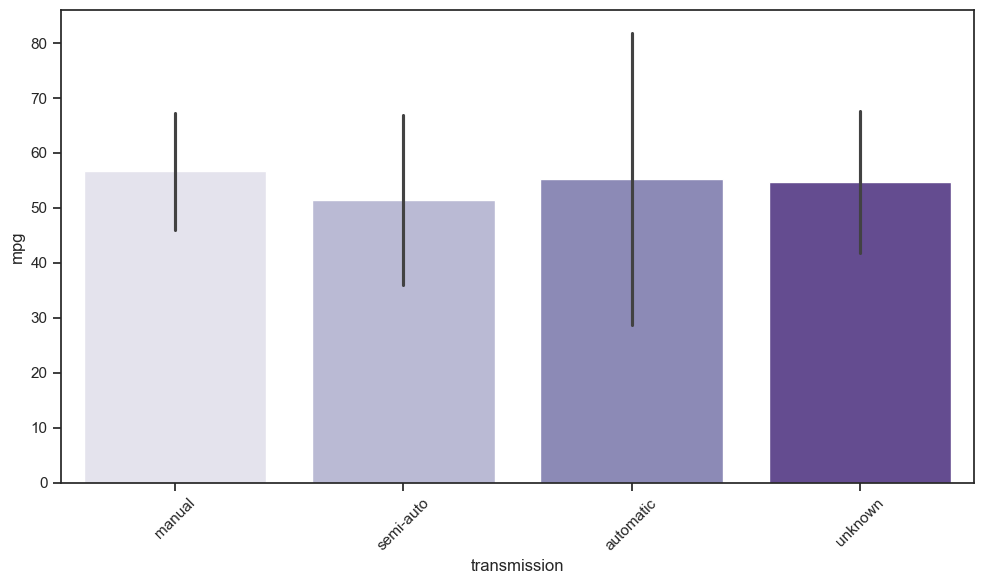

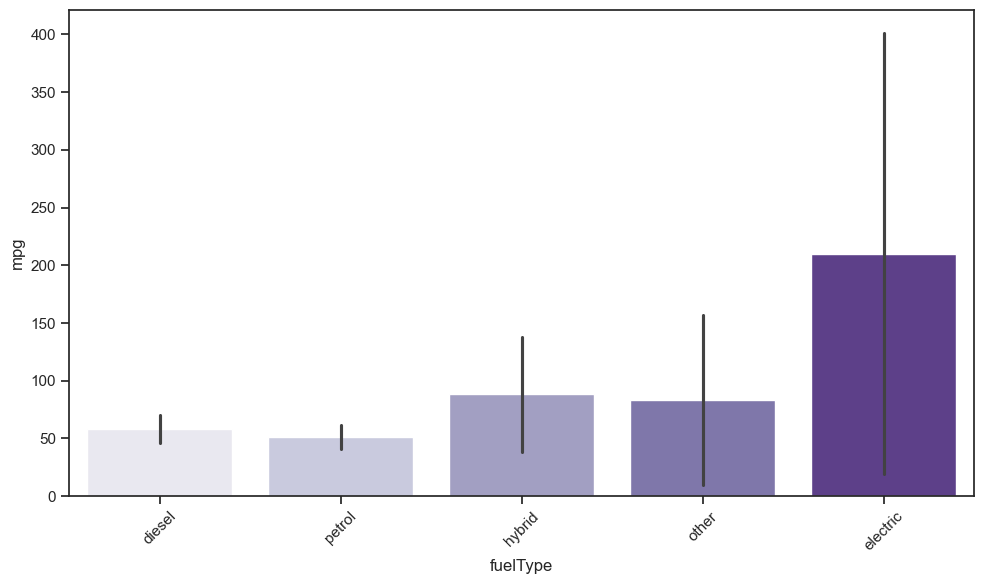

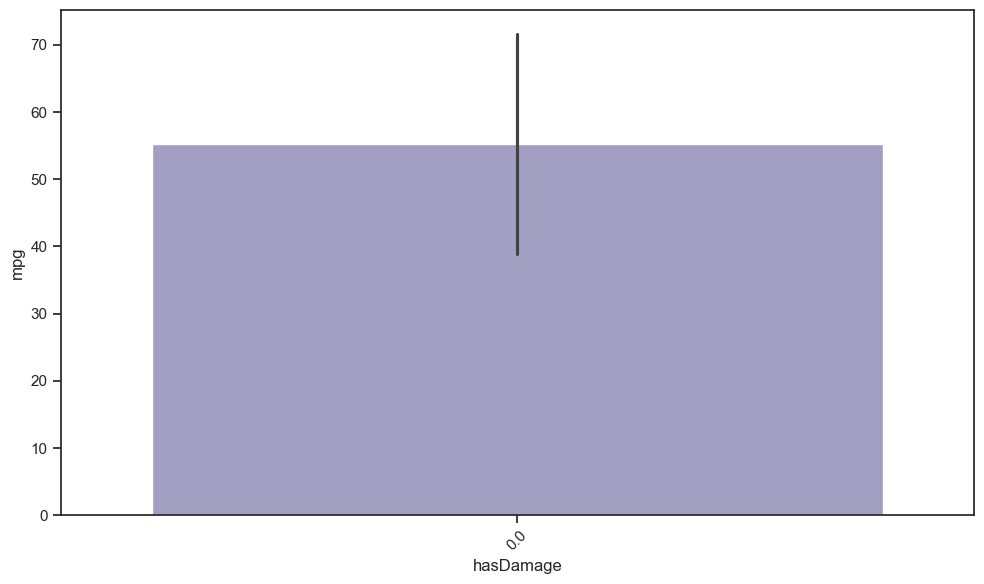

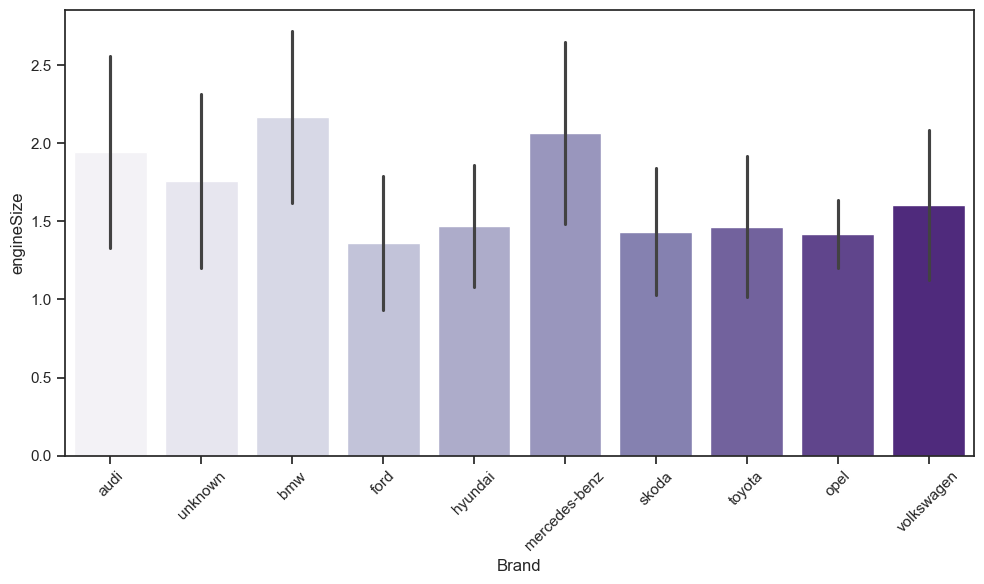

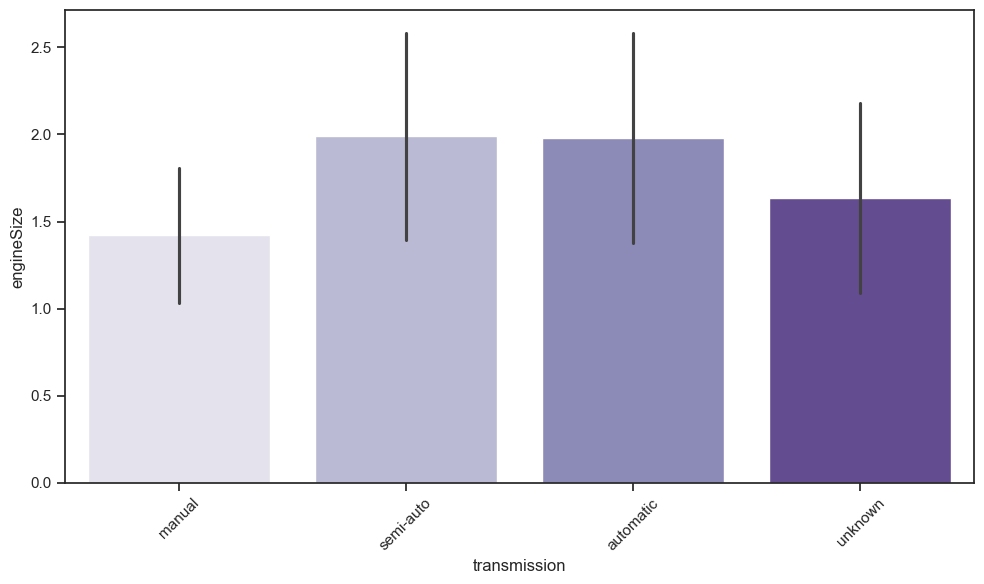

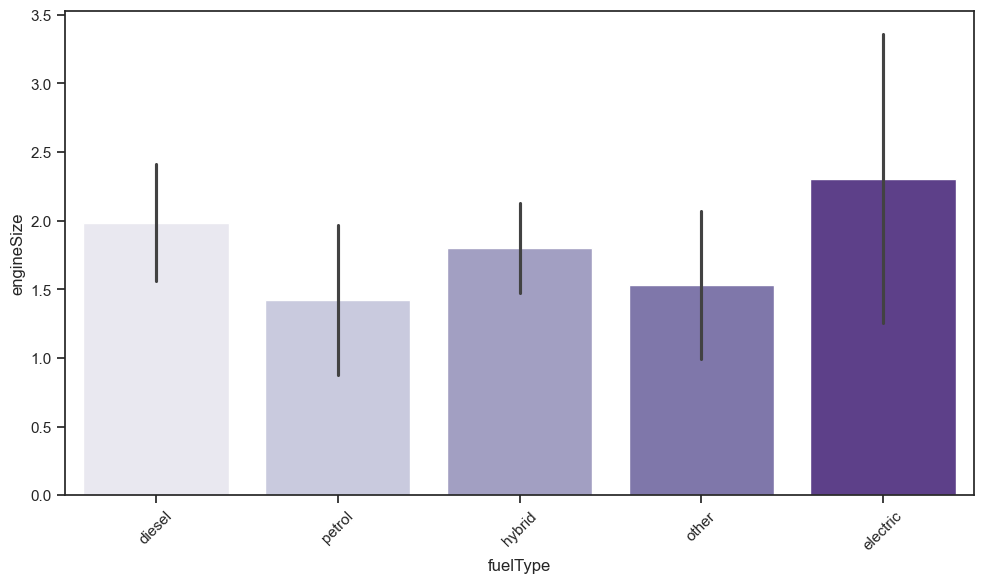

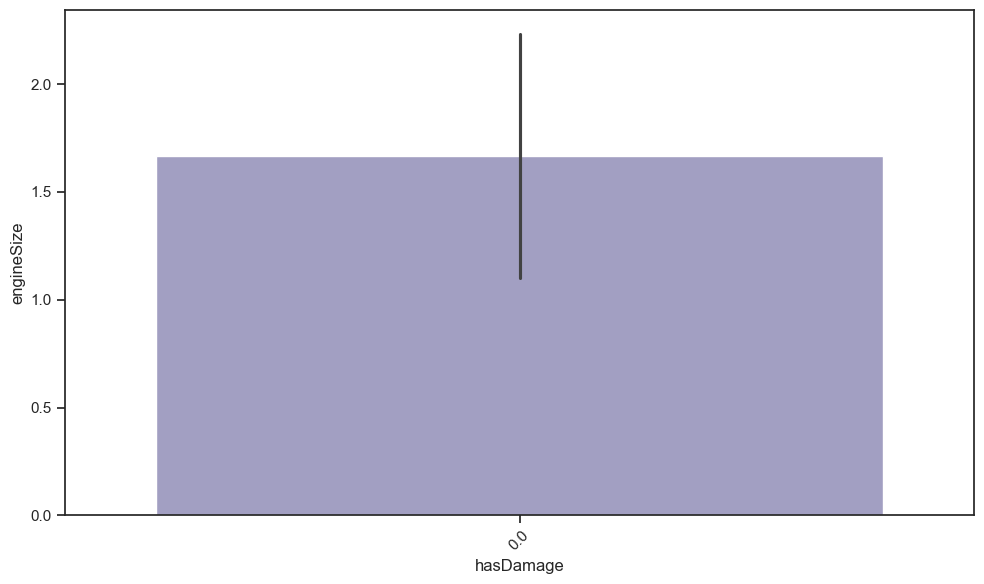

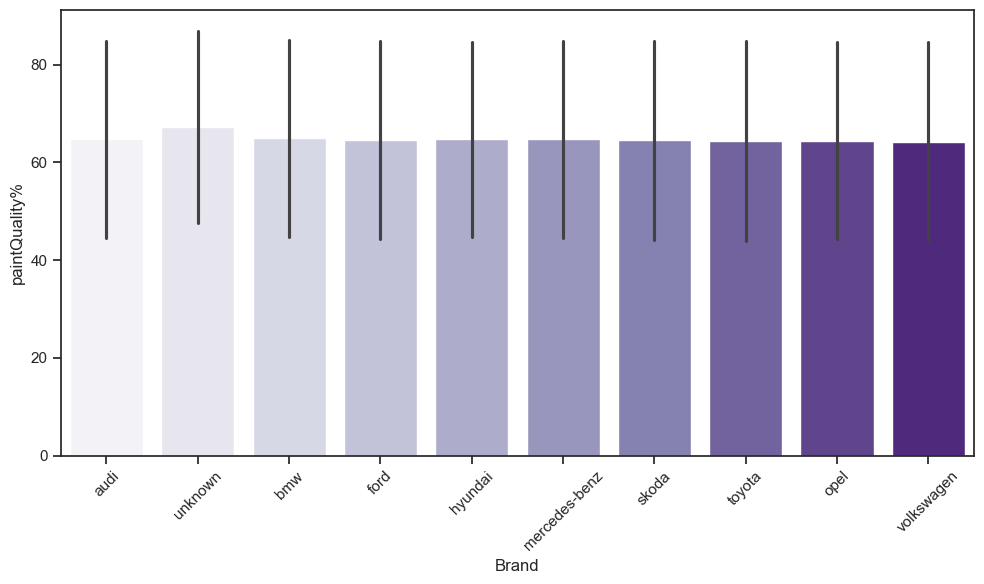

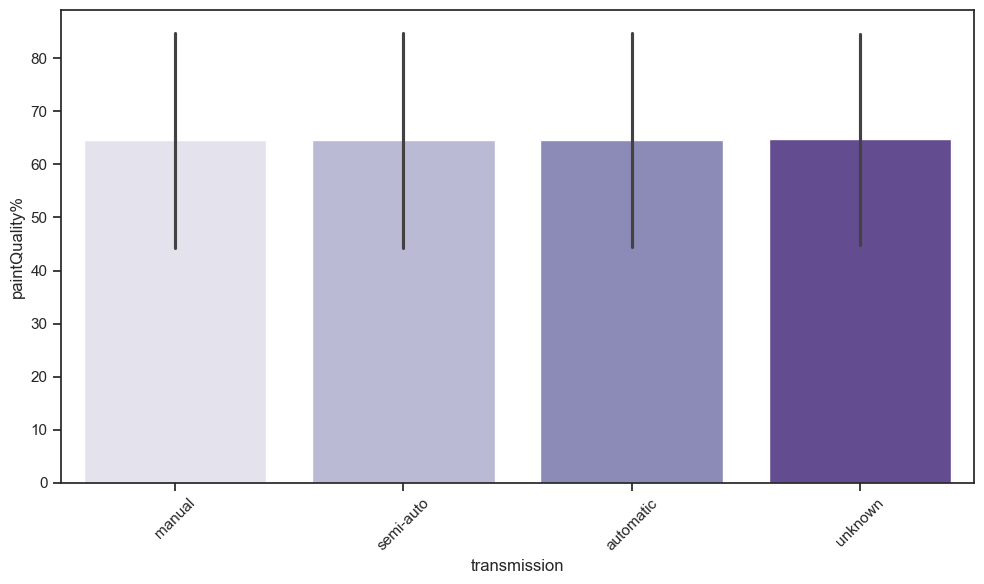

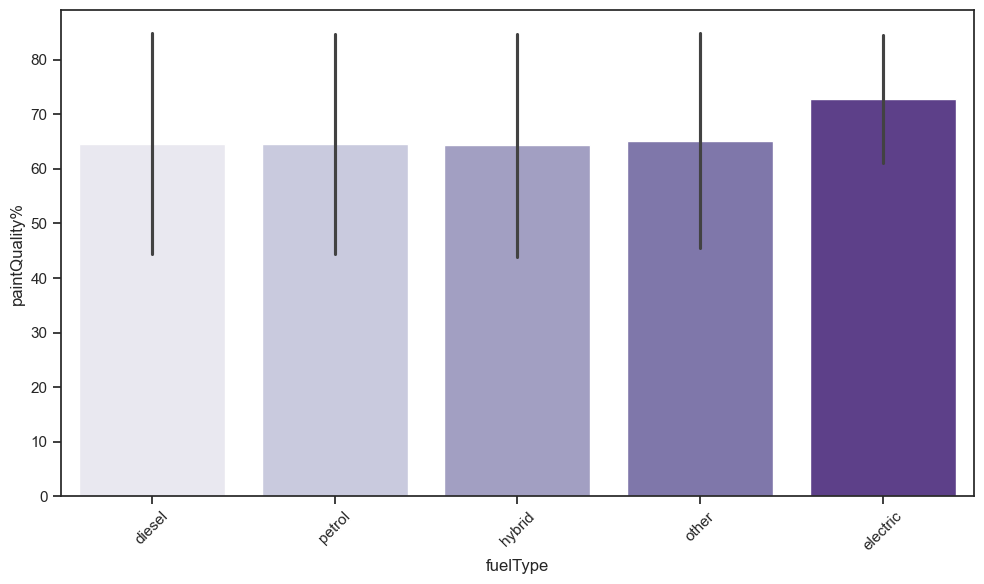

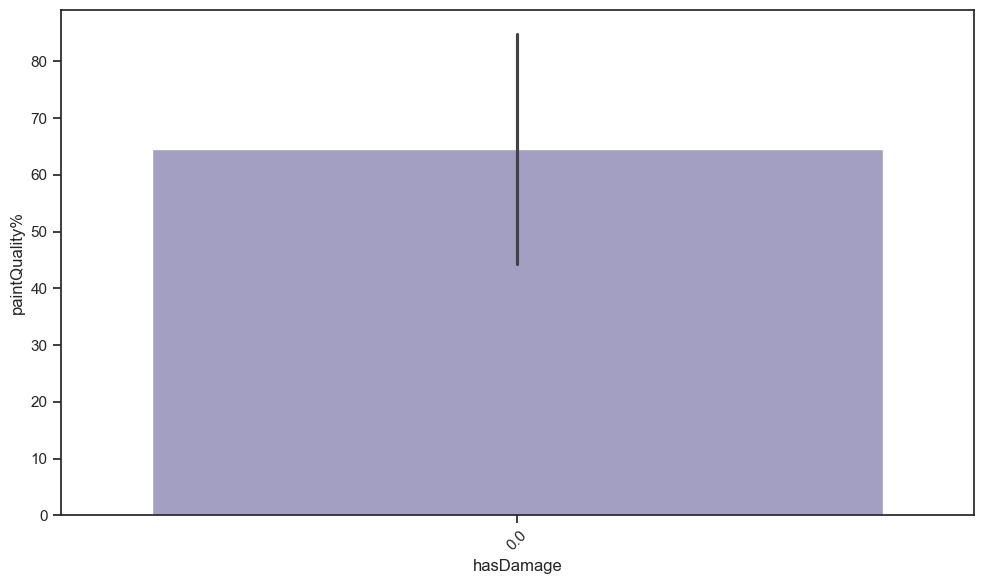

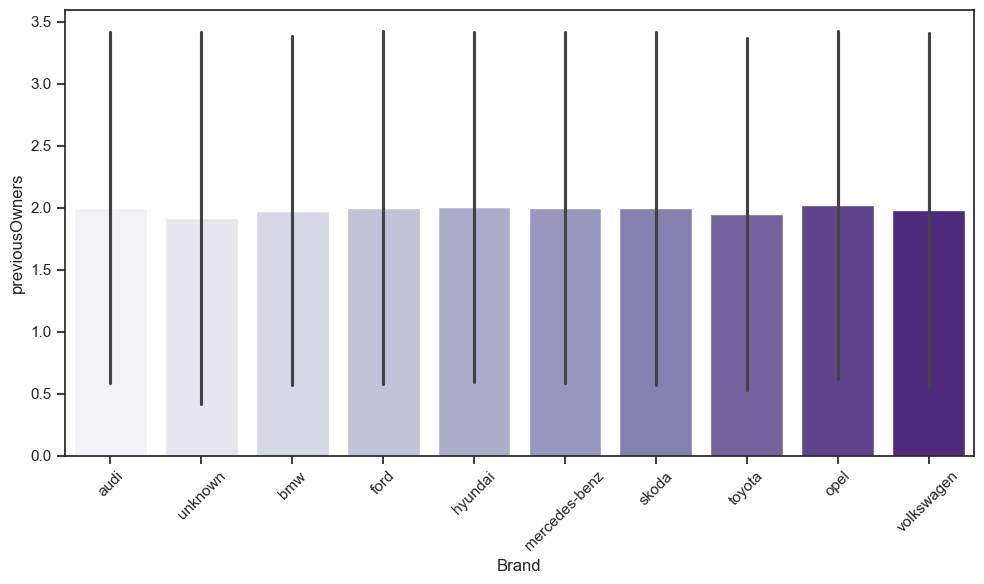

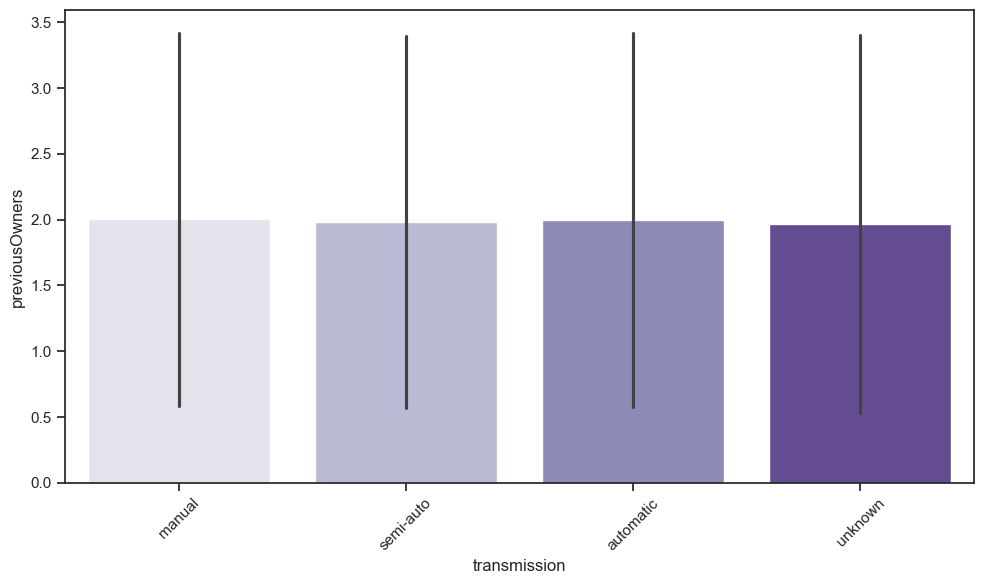

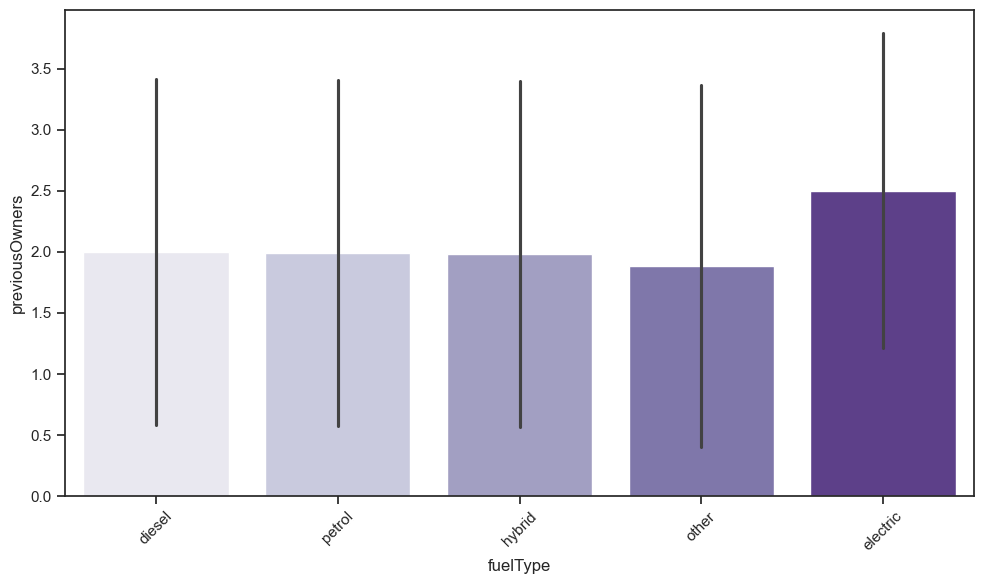

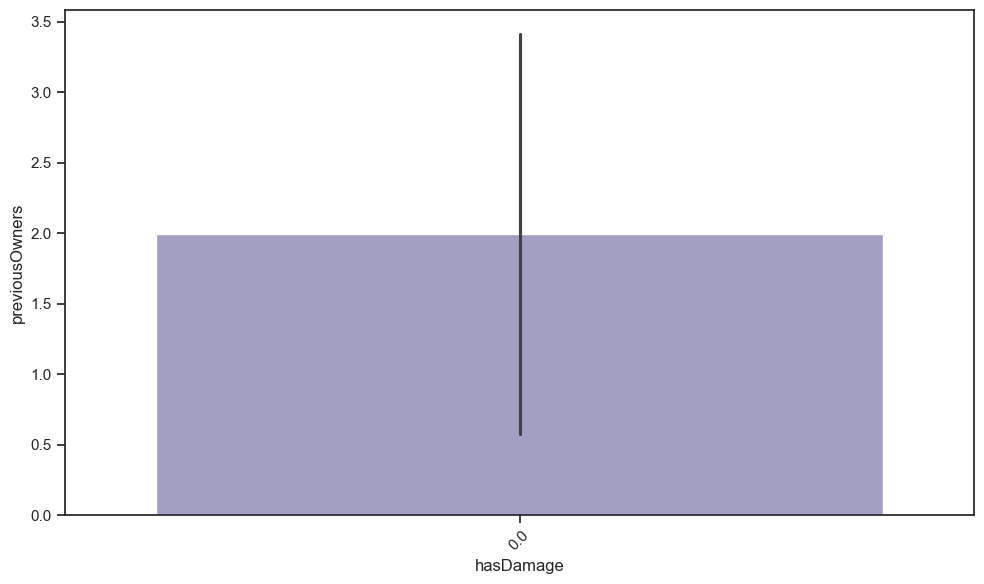

In [69]:
for column in metric_features:
    for x in [f for f in non_metric_features if f != 'model']:
        comparative_barplot(train, x, column)

# 3. Data cleaning and Preprocessing

## 3.1 Duplicates

In [70]:
train.duplicated().sum()

7

In [71]:
train[train.duplicated(keep=False)]

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
15152,ford,focus,2018.0,13500,manual,11382.0,petrol,NaN,NaN,1.0,57.0,4.0,0.0
21404,ford,focus,2018.0,13500,manual,11382.0,petrol,NaN,NaN,1.0,57.0,4.0,0.0
21775,ford,focus,2019.0,19500,manual,3000.0,diesel,NaN,NaN,1.5,91.0,4.0,0.0
23477,ford,focus,2017.0,14000,automatic,9137.0,petrol,NaN,NaN,1.0,48.0,4.0,0.0
25766,ford,focus,2017.0,14000,automatic,9137.0,petrol,NaN,NaN,1.0,48.0,4.0,0.0
28593,ford,focus,2019.0,19500,manual,3000.0,diesel,NaN,NaN,1.5,91.0,4.0,0.0
33774,hyundai,i10,2017.0,7500,manual,NaN,petrol,145.0,57.7,1.2,32.0,4.0,0.0
33890,hyundai,ioniq,2019.0,23991,automatic,5500.0,hybrid,135.0,78.5,1.6,39.0,3.0,0.0
34128,hyundai,i10,2017.0,7500,manual,NaN,petrol,145.0,57.7,1.2,32.0,4.0,0.0


In [72]:
train = train.drop_duplicates(subset=cols, keep='first')

## 3.2 Feature Engeneering

### 3.2.1 Feature Creation

Creating "carAge"

In [73]:
train['carAge'] = 2025 - train['year']

test['carAge'] = 2025 - test['year']

metric_features.append('carAge')
metric_features

['price',
 'year',
 'mileage',
 'tax',
 'mpg',
 'engineSize',
 'paintQuality%',
 'previousOwners',
 'carAge']

In [74]:
print(f'The number of rows with negative carAge values is: {train.loc[train['carAge'] < (0), ['carAge']].size}')
print(f'The number of rows with non-integer carAge values are: {train.loc[(train['carAge'] != round(train['carAge'])) & (train['carAge'].notna()), ['carAge']].size}')

The number of rows with negative carAge values is: 0
The number of rows with non-integer carAge values are: 0


Since we created a new feature called "carAge" which has the "same" meaning as "year", we will drop year column

In [75]:
train.drop(columns=['year'], inplace=True)

test.drop(columns=['year'], inplace=True)

metric_features.remove('year')
train.sample(10)

,Brand,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage,carAge
carID,,,,,,,,,,,,,
49088,skoda,yeti outdoor,12995,semi-auto,30000.0,petrol,125.0,51.4,1.2,72.0,4.0,0.0,9.0
72252,volkswagen,t-cross,17490,manual,4082.0,petrol,145.0,48.7,1.0,63.0,2.0,0.0,6.0
50982,skoda,kamiq,21995,automatic,45.0,petrol,145.0,43.5,1.5,89.0,2.0,0.0,6.0
47832,skoda,roomster,2495,manual,97000.0,petrol,190.0,40.9,1.4,41.0,1.0,0.0,16.0
50969,skoda,fabia,6495,manual,27625.0,petrol,145.0,57.7,1.0,72.0,3.0,0.0,7.0
54401,toyota,yaris,12495,manual,5931.0,petrol,145.0,47.9,1.5,31.0,3.0,0.0,6.0
38492,mercedes-benz,gla class,23820,semi-auto,3012.0,petrol,145.0,37.2,1.6,59.0,0.0,0.0,6.0
58697,opel,corsa,7900,manual,29280.0,petrol,30.0,57.6,1.0,46.0,2.0,0.0,9.0
4387,audi,q5,28070,semi-auto,13246.0,diesel,145.0,39.2,2.0,78.0,1.0,0.0,6.0


### 3.2.2 Data Type Conversions

In [76]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75966 entries, 0 to 75972
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           75966 non-null  string 
 1   model           75966 non-null  string 
 2   price           75966 non-null  int64  
 3   transmission    74444 non-null  object 
 4   mileage         74135 non-null  float64
 5   fuelType        74455 non-null  object 
 6   tax             67688 non-null  float64
 7   mpg             68008 non-null  float64
 8   engineSize      74186 non-null  float64
 9   paintQuality%   73716 non-null  float64
 10  previousOwners  73682 non-null  float64
 11  hasDamage       74418 non-null  float64
 12  carAge          74475 non-null  float64
dtypes: float64(8), int64(1), object(2), string(2)
memory usage: 8.1+ MB


mileage

In [77]:
train['mileage'].sample(20)

carID
24182     3896.0
65300    64250.0
29426    26159.0
7824     30590.0
47168    37047.0
39768     5088.0
1757       500.0
74363    23169.0
52313    18593.0
30658     8970.0
57842    18400.0
8047      6520.0
57769    16409.0
2433      6500.0
55061    19000.0
32686     9676.0
51013    32419.0
70036    41364.0
59995     1336.0
67846    23103.0
Name: mileage, dtype: float64

In [78]:
train.loc[(train['mileage'].notna()) & (train['mileage'] % 1 != 0), 'mileage']

carID
238       95204.181674
275       95204.181674
341       95204.181674
430       95204.181674
471       95204.181674
499       95204.181674
768       95204.181674
813       95204.181674
973       95204.181674
1198      95204.181674
1208      95204.181674
1371      95204.181674
1586      95204.181674
2208      95204.181674
2448      95204.181674
2527      95204.181674
2642      95204.181674
2752      95204.181674
2795      95204.181674
3035      95204.181674
3169      95204.181674
3284      95204.181674
3365      95204.181674
3716      95204.181674
3948      95204.181674
4307      95204.181674
4521      95204.181674
4981      95204.181674
5099      95204.181674
5505      95204.181674
6014      95204.181674
6060      95204.181674
6263      95204.181674
6801      95204.181674
6983      95204.181674
7347      95204.181674
7831     101153.348285
7920     101153.348285
8073     101153.348285
8290     101153.348285
8349     101153.348285
8362     101153.348285
8690     101153.348285
8997 

In [79]:
((train['mileage'].notna()) & (train['mileage'] % 1 != 0)).sum()

386

Since the majority of the values aren't floats, we will convert them to integer

tax

In [80]:
train['tax'].sample(20)

carID
42894    145.0
57029    145.0
49117    150.0
47532    145.0
25274    145.0
50506    125.0
56826     20.0
58609    145.0
30456    145.0
23047    145.0
20335      NaN
63983    165.0
7123     125.0
26108      NaN
16519      NaN
6581      30.0
24557    145.0
22951    125.0
3696     145.0
59499    145.0
Name: tax, dtype: float64

In [81]:
train.loc[(train['tax'].notna()) & (train['tax'] % 1 != 0), 'tax']

carID
174      327.915778
298      327.915778
509      327.915778
870      327.915778
1008     327.915778
1206     327.915778
1292     327.915778
2134     327.915778
2183     327.915778
2714     327.915778
3243     327.915778
3292     327.915778
3370     327.915778
3448     327.915778
3568     327.915778
3640     327.915778
4001     327.915778
4053     327.915778
4242     327.915778
4289     327.915778
4513     327.915778
4667     327.915778
5008     327.915778
5644     327.915778
5970     327.915778
5971     327.915778
6096     327.915778
6240     327.915778
6256     327.915778
6260     327.915778
6577     327.915778
6955     327.915778
7044     327.915778
7288     327.915778
7604     316.487189
7748     316.487189
8063     316.487189
8161     316.487189
9227     316.487189
9304     316.487189
9474     316.487189
9733     316.487189
9810     316.487189
9916     316.487189
10000    316.487189
10253    316.487189
10276    316.487189
10518    316.487189
10578    316.487189
11266    316.4

In [82]:
((train['tax'].notna()) & (train['tax'] % 1 != 0)).sum()

381

Since the majority of the values aren't floats, we will convert them to integer

mpg

In [83]:
train['mpg'].sample(20)

carID
43646    46.3
42137    55.4
70970    50.4
26528    65.7
44529    57.7
22031    57.7
4404     32.8
58392    44.1
7294     56.5
48355    60.1
69837    44.1
48283    67.3
26762     NaN
45588    64.2
22348     NaN
5528     56.5
73942    74.3
68170    48.7
20403    76.4
13681    65.7
Name: mpg, dtype: float64

In [84]:
train.loc[(train['mpg'].notna()) & (train['mpg'] % 1 != 0), 'mpg']

carID
0        83.1
1        55.4
2        53.3
3        51.4
4        47.9
         ... 
75967    40.9
75968    53.3
75969    32.8
75970    43.5
75971    49.6
Name: mpg, Length: 66367, dtype: float64

We should leave it as a float

engineSize

In [85]:
train['engineSize'].sample(20)

carID
51819    1.8
71152    2.0
66040    1.4
59360    1.0
75556    1.0
12554    2.0
34713    2.0
102      1.6
11574    2.0
73407    1.2
10918    3.0
65218    1.4
14650    1.5
45916    2.0
52710    1.8
25536    1.0
5082     NaN
55271    1.0
56129    1.6
28986    1.0
Name: engineSize, dtype: float64

In [86]:
train.loc[(train['engineSize'].notna()) & (train['engineSize'] % 1 != 0), 'engineSize']

carID
0        1.6
2        1.4
3        1.4
7        1.8
10       1.4
        ... 
75963    1.5
75964    1.6
75968    1.4
75970    1.5
75972    1.6
Name: engineSize, Length: 36328, dtype: float64

We should leave it as a float

paintQuality%

In [87]:
train['paintQuality%'].sample(20)

carID
30334    79.0
40606    64.0
45227    43.0
7843     74.0
63683    59.0
19446    40.0
6859     31.0
37438    73.0
16355    47.0
6232     38.0
17197    72.0
9075     32.0
17507    79.0
64663    68.0
1056     62.0
45516    36.0
40777    35.0
9814     60.0
33810    60.0
37960    83.0
Name: paintQuality%, dtype: float64

In [88]:
train.loc[(train['paintQuality%'].notna()) & (train['paintQuality%'] % 1 != 0), 'paintQuality%']

Series([], Name: paintQuality%, dtype: float64)

Since there are no paintQuality% values whith decimal places, let's convert it into integer

previousOwners  

In [89]:
train['previousOwners'].sample(20)

carID
26777    4.0
1874     0.0
492      2.0
41359    4.0
1232     3.0
6909     2.0
2236     1.0
9050     1.0
54132    4.0
7038     4.0
50435    3.0
9812     3.0
65863    1.0
14271    0.0
3694     0.0
49851    4.0
43498    NaN
41100    3.0
24443    0.0
40210    2.0
Name: previousOwners, dtype: float64

In [90]:
train.loc[(train['previousOwners'].notna()) & (train['previousOwners'] % 1 != 0), 'previousOwners']

Series([], Name: previousOwners, dtype: float64)

Since there are no previousOwners values whith decimal places, let's convert it into integer

carAge

In [91]:
train['carAge'].sample(20)

carID
43867     9.0
54402     7.0
30747    14.0
54603     6.0
59956     9.0
46544     8.0
35424     7.0
15151     7.0
34565     6.0
49010     6.0
20097     8.0
32939     9.0
69098     8.0
5705      9.0
63091     6.0
63738    10.0
23807     7.0
25027     2.0
35520    10.0
28953     8.0
Name: carAge, dtype: float64

In [92]:
train.loc[(train['carAge'].notna()) & (train['carAge'] % 1 != 0), 'carAge']

Series([], Name: carAge, dtype: float64)

Since there are no carAge values whith decimal places, let's convert it into integer

In [93]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75966 entries, 0 to 75972
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           75966 non-null  string 
 1   model           75966 non-null  string 
 2   price           75966 non-null  int64  
 3   transmission    74444 non-null  object 
 4   mileage         74135 non-null  float64
 5   fuelType        74455 non-null  object 
 6   tax             67688 non-null  float64
 7   mpg             68008 non-null  float64
 8   engineSize      74186 non-null  float64
 9   paintQuality%   73716 non-null  float64
 10  previousOwners  73682 non-null  float64
 11  hasDamage       74418 non-null  float64
 12  carAge          74475 non-null  float64
dtypes: float64(8), int64(1), object(2), string(2)
memory usage: 8.1+ MB


In [94]:
def data_type_convert(input_df):

    #Data type conversions
    #mileage
    input_df['mileage'] = input_df['mileage'].round().astype('Int64')
    #tax
    input_df['tax'] = input_df['tax'].round().astype('Int64')
    #paintQuality%
    input_df['paintQuality%'] = input_df['paintQuality%'].round().astype('Int64')
    #previousOwners
    input_df['previousOwners'] = input_df['previousOwners'].round().astype('Int64')
    #carAge
    input_df['carAge'] = input_df['carAge'].round().astype('Int64')

    return input_df

In [95]:
train = data_type_convert(train)

test = data_type_convert(test)

Now everything is in the right Dtype

### 3.2.3 Encoding before Train-Test Split

**We can apply OHE to the entire dataset before splitting because it's deterministic - it just creates binary columns based on the categories present in the data. It doesn't learn statistics like means, frequencies, or anything from the target. If we were using CountEncoder or TargetEncoder, we'd need to fit only on training data because those encoders learn from the target variable or value frequencies, which would leak information from validation/test sets.**

In [ ]:
non_metric_features

['Brand', 'model', 'transmission', 'fuelType', 'hasDamage']

In [ ]:
train['model'].nunique()

204

We will only use OHE for Brand, transmission and fueltype. Since model has a lot more unique values, we will use

In [ ]:
categorical_cols = non_metric_features.copy()

In [ ]:
categorical_cols.remove('model')

In [ ]:
categorical_cols.remove('hasDamage')

In [ ]:
categorical_cols

['Brand', 'transmission', 'fuelType']

In [ ]:
non_metric_features

['Brand', 'model', 'transmission', 'fuelType', 'hasDamage']

In [ ]:
def OneHotEncoder_catcols(input_df):
    ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

    # OHE
    encoded_array = ohe.fit_transform(input_df[categorical_cols])
    encoded_cols  = ohe.get_feature_names_out(categorical_cols)
    encoded_df    = pd.DataFrame(encoded_array, columns=encoded_cols, index=input_df.index)

    # choose metrics based on existing or not column price
    has_price = 'price' in input_df.columns
    metrics   = metric_features if has_price else [c for c in metric_features if c != 'price']

    parts = [input_df[metrics], encoded_df]
    for extra in ['model', 'hasDamage']:
        if extra in input_df.columns:
            parts.append(input_df[[extra]])

    input_df_encoded = pd.concat(parts, axis=1)
    return input_df_encoded

In [ ]:
test

,carID,Brand,model,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage,carAge
0,89856,hyundai,i30,automatic,30700,petrol,205,41.5,1.6,61,3,0.0,2
1,106581,volkswagen,tiguan,semi-auto,<NA>,petrol,150,38.2,2.0,60,2,0.0,8
2,80886,bmw,2 series,automatic,36792,petrol,125,51.4,1.5,94,2,0.0,9
3,100174,opel,grandland x,manual,5533,petrol,145,44.1,1.2,77,1,0.0,6
4,81376,bmw,1 series,semi-auto,9058,diesel,150,51.4,2.0,45,4,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32562,105775,volkswagen,tiguan,manual,27575,petrol,145,46.3,1.4,94,1,0.0,8
32563,81363,bmw,x2,automatic,1980,petrol,145,34.0,2.0,39,3,0.0,5
32564,76833,audi,q5,semi-auto,8297,diesel,145,38.2,2.0,88,4,0.0,6
32565,91768,mercedes-benz,a class,manual,<NA>,petrol,145,28.5,1.3,81,1,0.0,6


In [ ]:
train_encoded = OneHotEncoder_catcols(train)

test_encoded = OneHotEncoder_catcols(test)

In [ ]:
test_encoded['carID'] = test['carID'].values

In [ ]:
train_encoded.sample(10)

,price,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,carAge,Brand_audi,Brand_bmw,...,Brand_volkswagen,transmission_automatic,transmission_manual,transmission_semi-auto,fuelType_diesel,fuelType_electric,fuelType_hybrid,fuelType_petrol,model,hasDamage
carID,,,,,,,,,,,,,,,,,,,,,
28468,18000,30591,<NA>,NaN,2.0,31,2,8,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,focus,0.0
40959,16820,<NA>,125,58.9,2.1,32,2,9,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,e class,0.0
23312,9420,40792,0,57.7,1.0,<NA>,1,8,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,fiesta,0.0
21593,21000,52,<NA>,NaN,1.0,97,3,5,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,focus,0.0
67656,10390,23000,20,60.1,1.2,82,3,9,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,polo,0.0
30427,11300,7834,145,74.3,1.5,79,1,7,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,b-max,0.0
21374,6700,47000,0,65.7,1.0,53,4,11,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,fiesta,0.0
19967,9189,12444,0,NaN,1.5,49,2,9,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,b-max,0.0
16186,8999,32332,125,54.3,1.2,75,0,9,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,fiesta,0.0


In [ ]:
train_encoded.columns

Index(['price', 'mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%',
       'previousOwners', 'carAge', 'Brand_audi', 'Brand_bmw', 'Brand_ford',
       'Brand_hyundai', 'Brand_mercedes-benz', 'Brand_opel', 'Brand_skoda',
       'Brand_toyota', 'Brand_unknown', 'Brand_volkswagen',
       'transmission_automatic', 'transmission_manual',
       'transmission_semi-auto', 'fuelType_diesel', 'fuelType_electric',
       'fuelType_hybrid', 'fuelType_petrol', 'model', 'hasDamage'],
      dtype='object')

# 4. Export

In [96]:
train.to_csv('./train_data_EDA.csv')
test.to_csv('./test_data_EDA.csv')